In [1]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import entropy
from astropy import units as u
from astropy.convolution import Gaussian1DKernel, convolve, Model1DKernel
from astropy.modeling import models
plt.style.use('seaborn-poster')

In [2]:
plt.style.use('seaborn-poster')
plt.rc('axes', labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rcParams['xtick.minor.visible'] = True

# Figure 1

In [3]:
# experimental
lens= pd.read_hdf('../catalogs/lens.hdf','/data')
lens_pz = pd.read_hdf('../catalogs/lens_pz.hdf','/data')
joined_lens = lens.join(lens_pz.set_index('objid'), lsuffix='_l', rsuffix='_r')

In [4]:
print('{}, {}, {}'.format(len(lens), len(lens_pz), len(joined_lens)))

87306, 192768, 87306


In [5]:
# experimental
source = pd.read_hdf('../catalogs/source.hdf','/data')
source_pz = pd.read_hdf('../catalogs/source_pz.hdf','/data')
joined_source = source.join(source_pz.set_index('objid'), lsuffix='_l', rsuffix='_r')

In [6]:
print('{}, {}, {}'.format(len(source), len(source_pz), len(joined_source)))

270043, 1056451, 270043


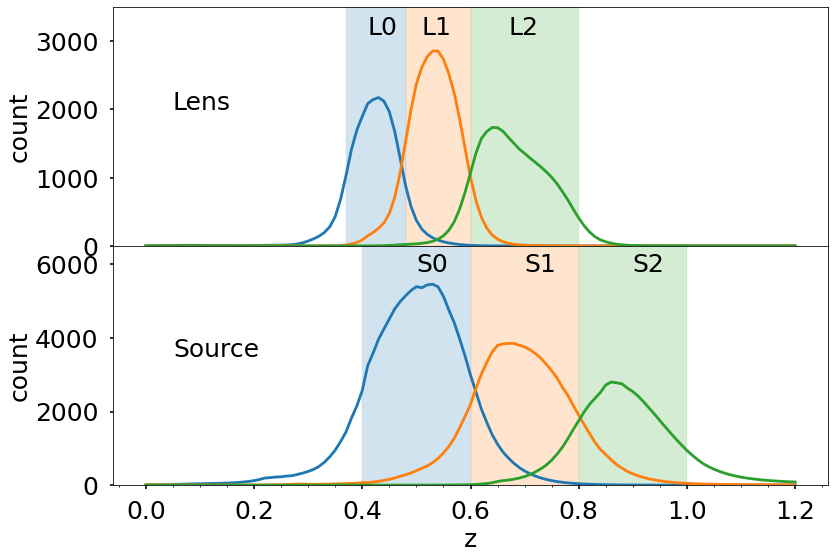

In [7]:
#lens_pz = pd.read_hdf('../catalogs/lens_pz.hdf','/data')
#source_pz = pd.read_hdf('../catalogs/source_pz.hdf','/data')

f, ax = plt.subplots(2, sharex=True)

z = (np.arange(121))*.01




#sumed_pz = lens_pz[lens_pz['w1'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, joined_lens[joined_lens['z_bin'] == 0].loc[:,'c0':'c120'].sum(axis=0).values, color='C0')
ax[0].fill_between([.37,.48], 3500, 0, alpha=.2, color='C0')

#sumed_pz = lens_pz[lens_pz['w2'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, joined_lens[joined_lens['z_bin'] == 1].loc[:,'c0':'c120'].sum(axis=0).values, color='C1')
ax[0].fill_between([.48,.6], 3500, 0, alpha=.2, color='C1')

#sumed_pz = lens_pz[lens_pz['w3'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, joined_lens[joined_lens['z_bin'] == 2].loc[:,'c0':'c120'].sum(axis=0).values, color='C2')
ax[0].fill_between([.6,.8], 3500, 0, alpha=.2, color='C2')
ax[0].set_ylabel('count')
ax[0].set_ylim([0,3500])

ax[0].annotate('L0', xy=(.41, 3100), size=25)
ax[0].annotate('L1', xy=(.51, 3100), size=25)
ax[0].annotate('L2', xy=(.67, 3100), size=25)
ax[0].annotate('Lens', xy=(.05, 2000), size=25)

#sumed_pz = source_pz[source_pz['w1'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, joined_source[joined_source['z_bin'] == 0].loc[:,'c0':'c120'].sum(axis=0).values, color='C0')
ax[1].fill_between([.4,.6], 6500, 0, alpha=.2, color='C0')

#sumed_pz = source_pz[source_pz['w2'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, joined_source[joined_source['z_bin'] == 1].loc[:,'c0':'c120'].sum(axis=0).values, color='C1')
#ax[1].plot(z, sumed_pz, color='C1')
ax[1].fill_between([.6,.8], 6500, 0, alpha=.2, color='C1')

#sumed_pz = source_pz[source_pz['w3'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, joined_source[joined_source['z_bin'] == 2].loc[:,'c0':'c120'].sum(axis=0).values, color='C2')
#ax[1].plot(z, sumed_pz, color='C2')
ax[1].fill_between([.8,1.0], 6500, 0, alpha=.2, color='C2')
ax[1].set_xlabel('z')
ax[1].set_ylabel('count')
ax[1].set_ylim([0,6500])

ax[1].annotate('S0', xy=(.5, 5800), size=25)
ax[1].annotate('S1', xy=(.7, 5800), size=25)
ax[1].annotate('S2', xy=(.9, 5800), size=25)
ax[1].annotate('Source', xy=(.05, 3500), size=25)

#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('bins.pdf')

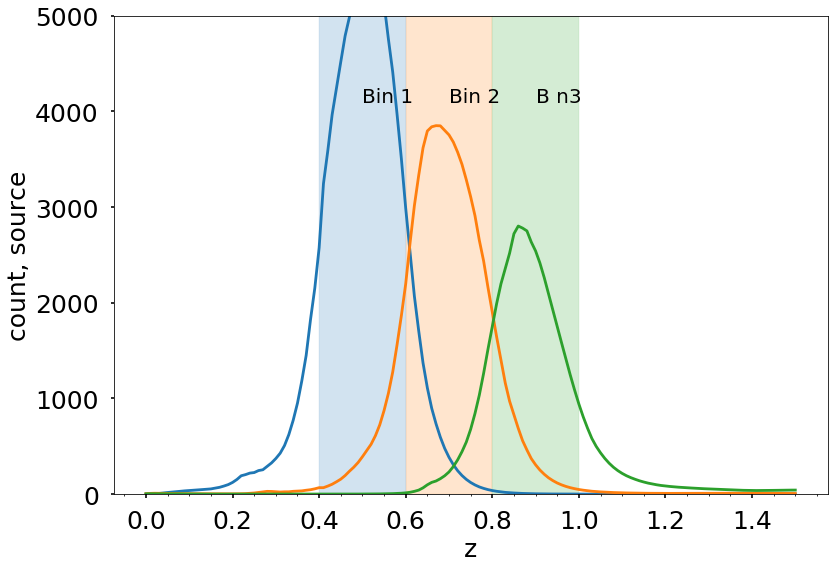

In [35]:
f, ax = plt.subplots()

z = (np.arange(151))*.01

#sumed_pz = source_pz[source_pz['w1'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax.plot(z, joined_source[joined_source['z_bin'] == 0].loc[:,'c0':'c150'].sum(axis=0).values, color='C0')
ax.fill_between([.4,.6], 5000, 0, alpha=.2, color='C0')

#sumed_pz = source_pz[source_pz['w2'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax.plot(z, joined_source[joined_source['z_bin'] == 1].loc[:,'c0':'c150'].sum(axis=0).values, color='C1')
#ax.plot(z, sumed_pz, color='C1')
ax.fill_between([.6,.8], 5000, 0, alpha=.2, color='C1')

#sumed_pz = source_pz[source_pz['w3'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax.plot(z, joined_source[joined_source['z_bin'] == 2].loc[:,'c0':'c150'].sum(axis=0).values, color='C2')
#ax[1].plot(z, sumed_pz, color='C2')
ax.fill_between([.8,1.0], 5000, 0, alpha=.2, color='C2')
ax.set_xlabel('z')
ax.set_ylabel('count, source')
ax.set_ylim([0,5000])

ax.annotate('Bin 1', xy=(.5, 4100), size=20)
ax.annotate('Bin 2', xy=(.7, 4100), size=20)
ax.annotate('B n3', xy=(.9, 4100), size=20)
#ax[1].annotate('Convergence field', xy=(.05, 3500), size=18)

#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('source_bins.png')

In [36]:
joined_source.head()

,subfield_l,Bdered,Vdered,Rdered,zdered,alpha,delta,z_b,z_bin,w1_l,...,c493,c494,c495,c496,c497,c498,c499,w1_r,w2_r,w3_r
objid,,,,,,,,,,,,,,,,,,,,,
111001416,F1p11,23.795074,23.640088,22.827788,23.101592,14.371648,12.957185,0.58,0,0.541995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.541995,0.196897,0.009888
111001434,F1p11,23.061874,22.786488,22.003487,21.524693,14.371389,12.956185,0.75,1,0.066678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066678,0.700360,0.181525
111001645,F1p11,23.466866,23.196079,22.410931,21.881230,14.368683,13.078283,0.76,1,0.073864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073864,0.521685,0.279355
111001934,F1p11,25.248641,23.911209,22.407381,21.715634,14.364000,13.086982,0.53,0,0.890854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.890854,0.080047,0.000000
111001968,F1p11,24.861274,24.047688,22.855488,22.409293,14.362907,12.960861,0.51,0,0.662420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.662420,0.143573,0.000000


### Save These P(z)s to the cosmosis working directory, so we can generate theory predictions to use for covariance estimation etc

In [37]:
cosdir = '/global/homes/i/ihasan/cosmosis/nofzs/'

In [38]:
# dont go too far out in z, otherwise cosmosis will complain it cant fit the n(z)s and shit itself
z = np.arange(151)*.01

L0 = joined_lens[joined_lens['z_bin'] == 0].loc[:,'c0':'c150'].sum(axis=0).values
L1 = joined_lens[joined_lens['z_bin'] == 1].loc[:,'c0':'c150'].sum(axis=0).values
L2 = joined_lens[joined_lens['z_bin'] == 2].loc[:,'c0':'c150'].sum(axis=0).values

S0 = joined_source[joined_source['z_bin'] == 0].loc[:,'c0':'c150'].sum(axis=0).values
S1 = joined_source[joined_source['z_bin'] == 1].loc[:,'c0':'c150'].sum(axis=0).values
S2 = joined_source[joined_source['z_bin'] == 2].loc[:,'c0':'c150'].sum(axis=0).values

#chop off tails
#L0[:30] = 0
#L0[55:] = 0
#L1[:40] = 0
#L1[65:] = 0
#L2[:50] = 0
#L2[85:] = 0 

#S0[:30] = 0
#S0[70:] = 0
#S1[:50] = 0
#S1[90:] = 0
#S2[:70] = 0
#S2[105:] = 0
np.savetxt(join(cosdir, 'pub_nofz.txt'), 
          np.column_stack([z, L0, L1, L2, S0, S1, S2]), fmt='%1.8f')

In [39]:
for i in [z, L0, L1, L2, S0, S1, S2]:
    print(len(i))

151
151
151
151
151
151
151


## Table 1

## mean pz

In [8]:
class moments():
    def __init__(self, z, pz):
        self.z = z
        self.pz = pz
    
    def run(self):
        self.normalize()
        self.mean()
        self.second()
        print('{:.3f} {:.3f}'.format(self.mean, self.var))
        return
    
    def normalize(self):
        area = np.trapz(self.pz, x=self.z)
        self.area = area
        self.pz /= self.area
        return
    
    def mean(self):
        mean = np.trapz(self.z*self.pz, x=self.z)
        self.mean = mean

        return
    def second(self):
        var = np.trapz(self.pz*(self.z - self.mean)**2, x = self.z)
        self.var = np.sqrt(var)
        return

z = (np.arange(121))*.01

In [9]:
sumed_pz = joined_lens[joined_lens['z_bin'] == 0].loc[:,'c0':'c120'].sum(axis=0).values
mo = moments(z, sumed_pz)
mo.run()

0.422 0.051


In [10]:
sumed_pz = joined_lens[joined_lens['z_bin'] == 1].loc[:,'c0':'c120'].sum(axis=0).values
mo = moments(z, sumed_pz)
mo.run()

0.532 0.047


In [11]:
sumed_pz = joined_lens[joined_lens['z_bin'] == 2].loc[:,'c0':'c120'].sum(axis=0).values
mo = moments(z, sumed_pz)
mo.run()

0.679 0.068


In [12]:
sumed_pz =  joined_source[joined_source['z_bin'] == 0].loc[:,'c0':'c120'].sum(axis=0).values
mo = moments(z, sumed_pz)
mo.run()

0.500 0.094


In [13]:
sumed_pz =  joined_source[joined_source['z_bin'] == 1].loc[:,'c0':'c120'].sum(axis=0).values
mo = moments(z, sumed_pz)
mo.run()

0.693 0.100


In [14]:
sumed_pz =  joined_source[joined_source['z_bin'] == 2].loc[:,'c0':'c120'].sum(axis=0).values
mo = moments(z, sumed_pz)
mo.run()

0.887 0.094


## count

In [15]:
len(joined_lens[joined_lens['z_bin'] == 0])

24288

In [16]:
len(joined_lens[joined_lens['z_bin'] == 1])

33918

In [17]:
len(joined_lens[joined_lens['z_bin'] == 2])

29100

In [18]:
len(joined_source[joined_source['z_bin'] == 0])

121491

In [19]:
len(joined_source[joined_source['z_bin'] == 1])

88707

In [20]:
len(joined_source[joined_source['z_bin'] == 2])

59845

## Means

In [21]:
primus_z = pd.read_csv('../catalogs/hectospec.tab', sep='\t')

In [22]:
lens_specz = joined_lens.join(primus_z.set_index('objid'), lsuffix='_l', rsuffix='_r')
lmask = np.isfinite(lens_specz['z'])
lens_specz = lens_specz[lmask].copy()

In [23]:
source_specz = joined_source.join(primus_z.set_index('objid'), lsuffix='_l', rsuffix='_r')
smask = np.isfinite(source_specz['z'])
source_specz = source_specz[smask].copy()

In [24]:
l0 = lens_specz[lens_specz['z_bin'] == 0]['z'].mean()
l1 = lens_specz[lens_specz['z_bin'] == 1]['z'].mean()
l2 = lens_specz[lens_specz['z_bin'] == 2]['z'].mean()


s0 = source_specz[source_specz['z_bin'] == 0]['z'].mean()
s1 = source_specz[source_specz['z_bin'] == 1]['z'].mean()
s2 = source_specz[source_specz['z_bin'] == 2]['z'].mean()

print(l0, l1, l2, s0, s1, s2)

0.430811896 0.5285680789842382 0.6417353055492638 0.5149228496116002 0.7067022053605615 0.855025432221163


In [59]:
z = (np.arange(151))*.01

In [60]:
l0 = moments(z, lens_specz[lens_specz['z_bin'] == 0].loc[:,'c0':'c150'].sum(axis=0).values)
l0.run()

0.424 0.051


In [61]:
l1 = moments(z, lens_specz[lens_specz['z_bin'] == 1].loc[:,'c0':'c150'].sum(axis=0).values)
l1.run()

0.529 0.047


In [62]:
l2 = moments(z, lens_specz[lens_specz['z_bin'] == 2].loc[:,'c0':'c150'].sum(axis=0).values)
l2.run()

0.680 0.066


In [63]:
s0 = moments(z, source_specz[source_specz['z_bin'] == 0].loc[:,'c0':'c150'].sum(axis=0).values)
s0.run()

0.498 0.080


In [64]:
l1 = moments(z, source_specz[source_specz['z_bin'] == 1].loc[:,'c0':'c150'].sum(axis=0).values)
l1.run()

0.697 0.088


In [65]:
l2 = moments(z, source_specz[source_specz['z_bin'] == 2].loc[:,'c0':'c150'].sum(axis=0).values)
l2.run()

0.896 0.112


In [66]:
l0_dz =  (0.42566926401515187 - 0.423)
l1_dz =  (0.5285899001261033 - 0.532)
l2_dz =  (0.6441196480769231 - 0.684)

s0_dz =  (0.5154116423966363 - 0.498)
s1_dz =  (0.6947121064727937 - 0.693)
s2_dz =  (0.8496724616513759 - 0.887)

In [67]:
for i in [l0_dz, l1_dz, l2_dz, s0_dz, s1_dz, s2_dz]:
    print(i)

0.0026692640151518843
-0.0034100998738967325
-0.03988035192307693
0.017411642396636284
0.0017121064727937396
-0.03732753834862412


# PIT filter

# train by magnitude

In [25]:
# shift the zbin assignment for the sources, so lense are 0,1,2, sources are 3,4,5
source_specz.loc[:, 'z_bin'] += 3

In [26]:
# we just need the Rband magnitude, z_bin, photozs, and spec-z
lens_pp = lens_specz.loc[:,'c0':'c499'].copy()
lens_pp['z'] = lens_specz['z']
lens_pp['Rdered'] = lens_specz['Rdered_l']
lens_pp['z_bin'] = lens_specz['z_bin']

In [27]:
source_pp = source_specz.loc[:,'c0':'c499'].copy()
source_pp['z'] = source_specz['z']
source_pp['Rdered'] = source_specz['Rdered_l']
source_pp['z_bin'] = source_specz['z_bin']

joined_df = pd.concat([lens_pp, source_pp])

In [28]:
joined_df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c493,c494,c495,c496,c497,c498,c499,z,Rdered,z_bin
objid,,,,,,,,,,,,,,,,,,,,,
513026341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538117,21.013199,1
513026491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312608,21.605198,0
513026776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640923,20.781799,2
513029646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.552158,21.779798,0
513031324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529672,21.662529,1


In [12]:
#joined_z_pz_phot = joined_df.join(primus_z.set_index('objid'), lsuffix='_l', rsuffix='_r')

In [13]:
#match_mask = np.isfinite(joined_z_pz_phot['z_r'].values)
#joined_z_pz_phot = joined_z_pz_phot[match_mask].copy()

In [12]:
print(len(joined_lens), len(joined_source), len(joined_df), len(joined_z_pz_phot))

NameError: name 'joined_z_pz_phot' is not defined

In [29]:
def calc_conv_pit(row, binwidth):
#    l0_dz = int(100 * (0.42566926401515187 - 0.423))
#    l1_dz = int(100 * (0.5285899001261033 - 0.532))
#    l2_dz = int(100 * (0.6441196480769231 - 0.684))

#    s0_dz = int(100 * (0.5154116423966363 - 0.498))
#    s1_dz = int(100 * (0.6947121064727937 - 0.693))
#    s2_dz = int(100 * (0.8496724616513759 - 0.887))

    spec_z = row['z']
    spec_z_idx = spec_z*100
    spec_z_idx = int(spec_z_idx)
    g = Gaussian1DKernel(stddev=binwidth)
    y = row['c0':'c499'].values
#    if row['z_bin'] == 0:
#        y = shift_nz(y, l0_dz)
#    elif row['z_bin'] == 1:
#        y = shift_nz(y, l1_dz)
#    elif row['z_bin'] == 2:
#        y = shift_nz(y, l2_dz)
#    elif row['z_bin'] == 3:
#        y = shift_nz(y, s0_dz)
#    elif row['z_bin'] == 4:
#        y = shift_nz(y, s1_dz)
#    elif row['z_bin'] == 5:
#        y = shift_nz(y, s3_dz)
    z = convolve(y, g)
    
    
    pz = z[:spec_z_idx]
    pit = np.trapz(pz, x=np.arange(0, spec_z_idx))
    return pit

def calc_kl(binwidth, dataFrame, nbins=30):
    dataFrame = dataFrame.copy()
    dataFrame['conv_pit'] = dataFrame.apply(calc_conv_pit, axis=1, args=(binwidth,))
    hist, edges = np.histogram(dataFrame['conv_pit'], bins=nbins)
    uni_dens = np.ones(len(hist))
    kl = entropy(hist, uni_dens)
    return kl

In [30]:
calc_conv_pit(joined_df.iloc[0], 2)

0.12597367310365898

In [31]:
joined_df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c493,c494,c495,c496,c497,c498,c499,z,Rdered,z_bin
objid,,,,,,,,,,,,,,,,,,,,,
513026341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538117,21.013199,1
513026491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312608,21.605198,0
513026776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640923,20.781799,2
513029646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.552158,21.779798,0
513031324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529672,21.662529,1


In [32]:
mags = joined_df['Rdered'].values.copy()
mags.sort()
mags_csum = np.cumsum(mags)
mags_csum /= mags.sum()

In [33]:
q1 = mags[np.where(mags_csum > .25)[0]][0]
q2 = mags[np.where(mags_csum > .50)[0]][0]
q3 = mags[np.where(mags_csum > .75)[0]][0]

In [34]:
q3

22.699716635510324

In [35]:
n0 = len(joined_df[joined_df['Rdered'] < q1])
n1 = len(joined_df[(joined_df['Rdered'] > q1) & (joined_df['Rdered'] < q2)])
n2 = len(joined_df[(joined_df['Rdered'] > q2) & (joined_df['Rdered'] < q3)])
n3 = len(joined_df[(joined_df['Rdered'] > q3)])
print(n0, n1, n2, n3)

1942 1858 1816 1778


In [20]:
q1_res = minimize(calc_kl, 1, args=(joined_df[joined_df['Rdered'] < q1],), method='Nelder-Mead')

In [21]:
q1_res.x

array([4.56875])

In [22]:
q2_res = minimize(calc_kl, 1, args=(joined_df[(joined_df['Rdered'] > q1) & (joined_df['Rdered'] < q2)],), method='Nelder-Mead')

In [23]:
q2_res.x

array([6.95])

In [24]:
q3_res = minimize(calc_kl, 1, args=(joined_df[(joined_df['Rdered'] > q2 ) & (joined_df['Rdered'] < q3)],), method='Nelder-Mead')

In [25]:
q3_res.x

array([8.9625])

In [26]:
q4_res = minimize(calc_kl, 9, args=(joined_df[(joined_df['Rdered'] > q3)],), method='Nelder-Mead')

In [27]:
q4_res.x

array([12.825])

In [36]:
def conv_pz(row, q1=q1, q2=q2, q3=q3, b1=4.56875, b2=6.95, b3=8.9625, b4=12.825):
#    spec_z = row['z']
#    spec_z_idx = spec_z*100
#    spec_z_idx = int(spec_z_idx)

    R = row['Rdered']
    if R <= q1:
        binwidth=b1
    elif (R > q1) & (R <= q2):
        binwidth = b2
    elif (R > q2) & (R <= q3):
        binwidth = b3
    elif (R > q3):
        binwidth = b4
    else:
        raise ValueError
    
    g = Gaussian1DKernel(stddev=binwidth)
    y = row['c0':'c499'].values
    z = convolve(y, g)
    return z

In [37]:
smoothed_df = joined_df.apply(conv_pz, axis=1)

In [38]:
joined_df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c493,c494,c495,c496,c497,c498,c499,z,Rdered,z_bin
objid,,,,,,,,,,,,,,,,,,,,,
513026341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538117,21.013199,1
513026491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312608,21.605198,0
513026776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640923,20.781799,2
513029646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.552158,21.779798,0
513031324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529672,21.662529,1


In [39]:
lens= pd.read_hdf('../catalogs/lens.hdf','/data')
lens_pz = pd.read_hdf('../catalogs/lens_pz.hdf','/data')
joined_lens = lens.join(lens_pz.set_index('objid'), lsuffix='_l', rsuffix='_r')

In [40]:
source = pd.read_hdf('../catalogs/source.hdf','/data')
source_pz = pd.read_hdf('../catalogs/source_pz.hdf','/data')
joined_source = source.join(source_pz.set_index('objid'), lsuffix='_l', rsuffix='_r')

In [41]:
smoothed_lens_pz = joined_lens.apply(conv_pz, axis=1)

In [42]:
smoothed_source_pz = joined_source.apply(conv_pz, axis=1)

In [79]:
smoothed_lens_pz.to_hdf('../catalogs/lens_pz_broad.hdf','/data')

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "H5Fint.c", line 1700, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 623, in H5F__super_read
    truncated file: eof = 706234904, sblock->base_addr = 0, stored_eof = 712869256

End of HDF5 error back trace

Unable to open/create file '../catalogs/lens_pz_broad.hdf'

In [27]:
smoothed_source_pz.to_hdf('../catalogs/source_pz_broad.hdf','/data')

/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->values] [items->None]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [46]:
smoothed_source_pz = pd.read_hdf('../catalogs/source_pz_broad.hdf','/data')

FileNotFoundError: File ../catalogs/source_pz_broad.hdf does not exist

In [43]:
source = pd.read_hdf('../catalogs/source.hdf','/data')

In [7]:
smoothed_source_pz.keys()

Int64Index([111001416, 111001434, 111001645, 111001934, 111001968, 111002004,
            111002055, 111002066, 111002220, 111002295,
            ...
            533133387, 533133430, 533133433, 533133453, 533133536, 533133666,
            533133777, 533133789, 533133817, 533133874],
           dtype='int64', name='objid', length=270043)

In [44]:
l1 = lens[lens['z_bin']==0].index
l1_list = []
for i in l1:
    l1_list.append(smoothed_lens_pz[i])
    
l2 = lens[lens['z_bin']==1].index
l2_list = []
for i in l2:
    l2_list.append(smoothed_lens_pz[i])
    
l3 = lens[lens['z_bin']==2].index
l3_list = []
for i in l3:
    l3_list.append(smoothed_lens_pz[i])

In [45]:
s1 = source[source['z_bin']==0].index
s1_list = []
for i in s1:
    s1_list.append(smoothed_source_pz[i])
    
s2 = source[source['z_bin']==1].index
s2_list = []
for i in s2:
    s2_list.append(smoothed_source_pz[i])
    
s3 = source[source['z_bin']==2].index
s3_list = []
for i in s3:
    s3_list.append(smoothed_source_pz[i])
    

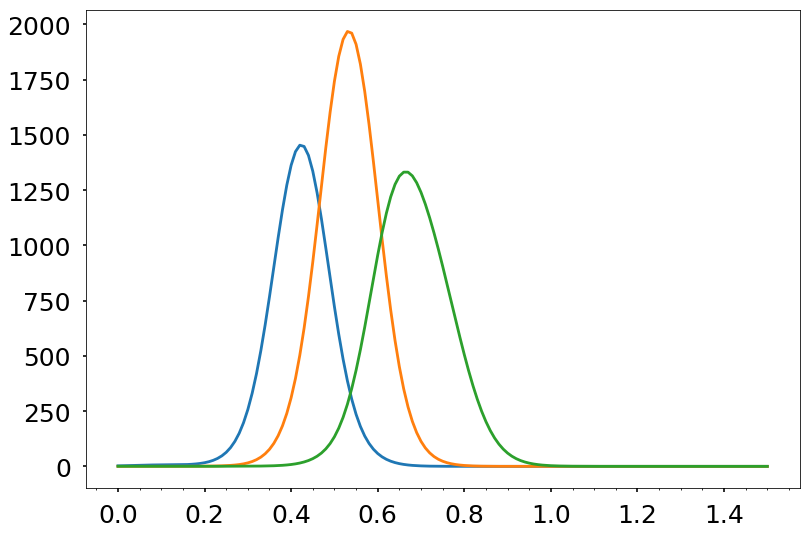

In [83]:
plt.plot(np.arange(151)*.01, np.array(l1_list).sum(axis=0)[:151])
plt.plot(np.arange(151)*.01, np.array(l2_list).sum(axis=0)[:151])
plt.plot(np.arange(151)*.01, np.array(l3_list).sum(axis=0)[:151])

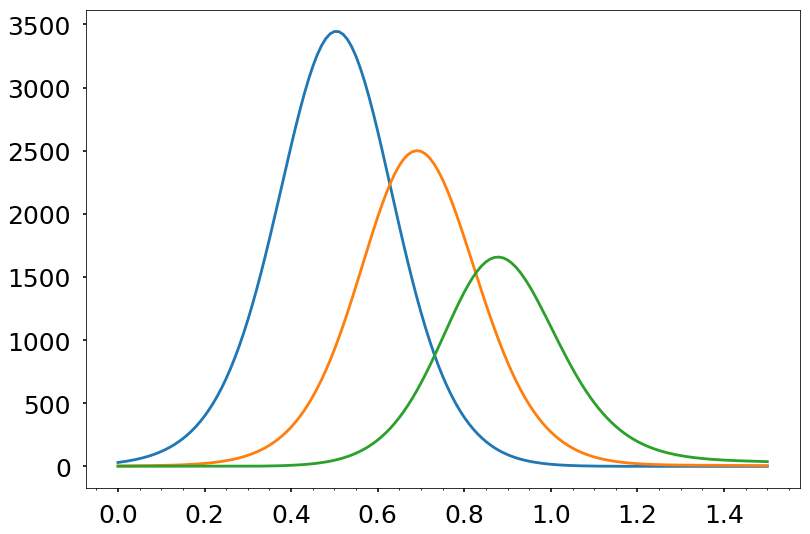

In [27]:
plt.plot(np.arange(151)*.01, np.array(s1_list).sum(axis=0)[:151])
plt.plot(np.arange(151)*.01, np.array(s2_list).sum(axis=0)[:151])
plt.plot(np.arange(151)*.01, np.array(s3_list).sum(axis=0)[:151])

In [85]:
# dont go too far out in z, otherwise cosmosis will complain it cant fit the n(z)s and shit itself
z = np.arange(151)*.01

L0=np.array(l1_list).sum(axis=0)[:151]
L1=np.array(l2_list).sum(axis=0)[:151]
L2=np.array(l3_list).sum(axis=0)[:151]

S0=np.array(s1_list).sum(axis=0)[:151]
S1=np.array(s2_list).sum(axis=0)[:151]
S2=np.array(s3_list).sum(axis=0)[:151]


np.savetxt(join(cosdir, 'pub_smooth_nofz.txt'), 
          np.column_stack([z, L0, L1, L2, S0, S1, S2]), fmt='%1.8f')

In [27]:
np.arange(0,1.21,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ])

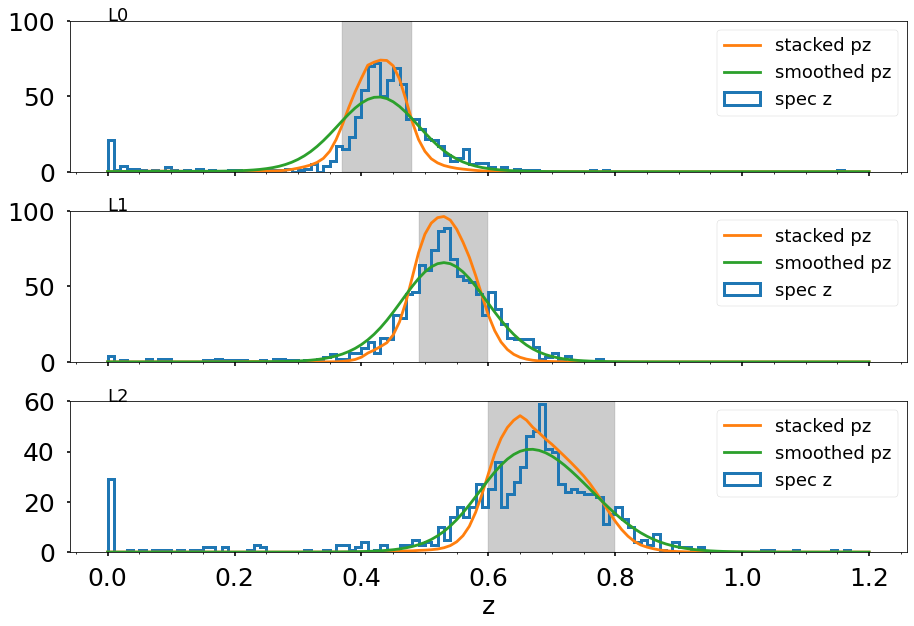

In [47]:
f, ax = plt.subplots(3, sharex='col', )

z = (np.arange(121))*.01
ax[0].hist(joined_df[joined_df['z_bin'] == 0]['z'], bins=z, histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['z_bin'] == 0].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, sumed_pz, label='stacked pz')
ax[0].plot(z, smoothed_df[joined_df['z_bin'] == 0].sum(axis=0)[:121], label='smoothed pz')
#ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[0].fill_between([.37,.48], 100, 0, alpha=.2, color='k')
ax[0].set_ylim([0,100])
ax[0].legend(fontsize=18)
ax[0].annotate('L0', xy=(0,100), size=18)

ax[1].hist(joined_df[joined_df['z_bin'] == 1]['z'], bins=z, histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['z_bin'] == 1].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, sumed_pz, label='stacked pz')
ax[1].plot(z, smoothed_df[joined_df['z_bin'] == 1].sum(axis=0)[:121], label='smoothed pz')
#ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[1].fill_between([.49,.6], 100, 0, alpha=.2, color='k')
ax[1].set_ylim([0,100])
ax[1].legend(fontsize=18)
ax[1].annotate('L1', xy=(0,100), size=18)

ax[2].hist(joined_df[joined_df['z_bin'] == 2]['z'], bins=z, histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['z_bin'] == 2].loc[:,'c0':'c120'].sum(axis=0).values
ax[2].plot(z, sumed_pz, label='stacked pz')
ax[2].plot(z, smoothed_df[joined_df['z_bin'] == 2].sum(axis=0)[:121], label='smoothed pz')
#ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[2].fill_between([.6,.8], 60, 0, alpha=.2, color='k')
ax[2].set_ylim([0,60])
ax[2].legend(fontsize=18)
ax[2].annotate('L2', xy=(0,60), size=18)
ax[2].set_xlabel('z')

plt.tight_layout()

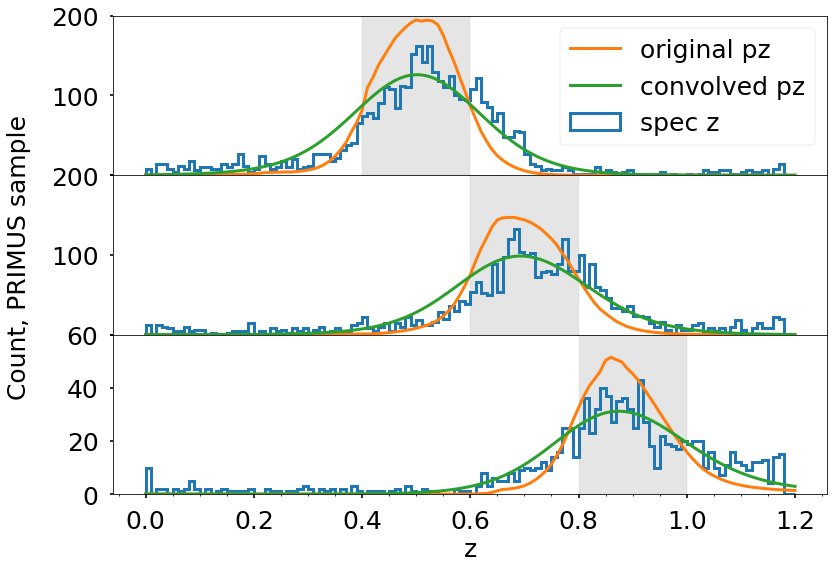

In [46]:
f, ax = plt.subplots(3, sharex=True)

z = (np.arange(121))*.01
ax[0].hist(joined_df[joined_df['z_bin'] == 3]['z'], bins=z, histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['z_bin'] == 3].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, sumed_pz, label='original pz', lw=3)
ax[0].plot(z, smoothed_df[joined_df['z_bin'] == 3].sum(axis=0)[:121], label='convolved pz', lw=3)
#ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[0].fill_between([.4,.6], 100, 0, alpha=.1, color='k')
ax[0].set_ylim([0,100])
ax[0].legend(fontsize=25)
#ax[0].annotate('L0', xy=(0,160), size=22)
ax[0].set_yticklabels({ '':0, '100':100, '200':200})
ax[0].tick_params(bottom='off')

ax[1].hist(joined_df[joined_df['z_bin'] == 4]['z'], bins=z, histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['z_bin'] == 4].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, sumed_pz, label='stacked pz', lw=3)
ax[1].plot(z, smoothed_df[joined_df['z_bin'] == 4].sum(axis=0)[:121], label='smoothed pz', lw=3)
#ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[1].fill_between([.6,.8], 100, 0, alpha=.1, color='k')
ax[1].set_ylim([0,100])
#ax[1].legend(fontsize=18)
#ax[1].annotate('L1', xy=(0,130), size=22)
ax[1].set_yticklabels({ '':0, '100':100, '200':200})
ax[1].tick_params(bottom='false')

ax[2].hist(joined_df[joined_df['z_bin'] == 5]['z'], bins=z, histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['z_bin'] == 5].loc[:,'c0':'c120'].sum(axis=0).values
ax[2].plot(z, sumed_pz, label='stacked pz', lw=3)
ax[2].plot(z, smoothed_df[joined_df['z_bin'] == 5].sum(axis=0)[:121], label='smoothed pz', lw=3)
#ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[2].fill_between([.8,1.], 60, 0, alpha=.1, color='k')
ax[2].set_ylim([0,60])
#ax[2].legend(fontsize=18)
#ax[2].annotate('L2', xy=(0,80), size=22)
ax[2].set_xlabel('z')

f.text(0.01, 0.5, 'Count, PRIMUS sample', va='center', rotation='vertical', fontsize=25)

#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('source_broad.pdf')

In [37]:
cols = joined_df.columns[:500]
names = [c for c in cols]
ll = [a for a in smoothed_df.values]
smoothed = pd.DataFrame(ll, columns=names, index=smoothed_df.index.astype(int)).join(joined_df['z'])

In [38]:
ll[0].size

500

In [39]:
def calc_pit(row):
    spec_z = row['z']
    spec_z_str = spec_z*100
    spec_z_str = str(int(spec_z_str))
    pz = row['c0':'c'+spec_z_str]
    pit = np.trapz(pz, x=np.arange(0, len(row['c0':'c'+spec_z_str])))
    return pit

In [40]:
joined_df['pit'] = joined_df.apply(calc_pit, axis=1)
smoothed['s_pit'] = smoothed.apply(calc_pit, axis=1)

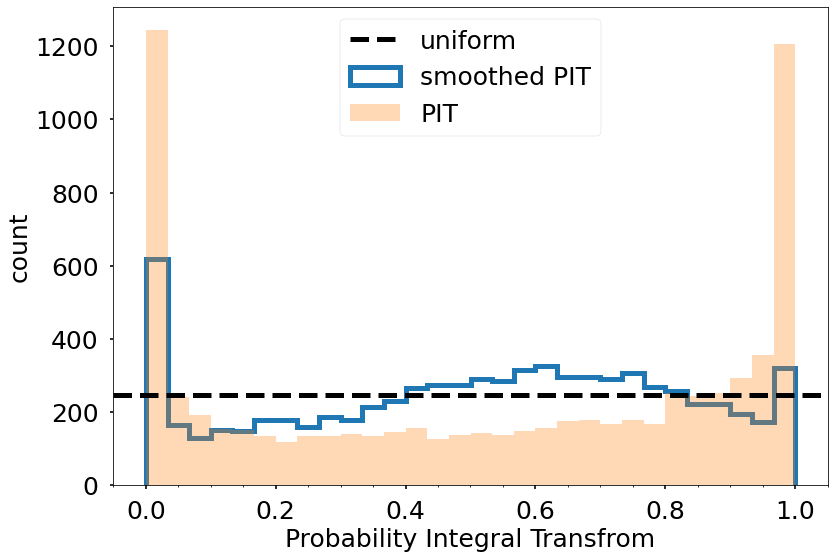

In [64]:
plt.hist(smoothed['s_pit'], histtype='step', bins=30, lw =5, label='smoothed PIT');
plt.hist(joined_df['pit'], bins=30, lw =5, alpha=.3, label='PIT');
plt.axhline(len(joined_df)/30, ls='--', color='k', label='uniform',  lw=5)
plt.xlabel('Probability Integral Transfrom')
plt.ylabel('count')
plt.legend(fontsize=25)
plt.savefig('pit.pdf')

In [44]:
#joined_df = joined_df.drop('s_pit', axis=1)

In [91]:
joined_df.columns[:499]

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c489', 'c490', 'c491', 'c492', 'c493', 'c494', 'c495', 'c496', 'c497',
       'c498'],
      dtype='object', length=499)

In [45]:
#joined_df = joined_df.join(smoothed.loc[:,'s_pit'])

Text(0.5,-0.05,'PIT')

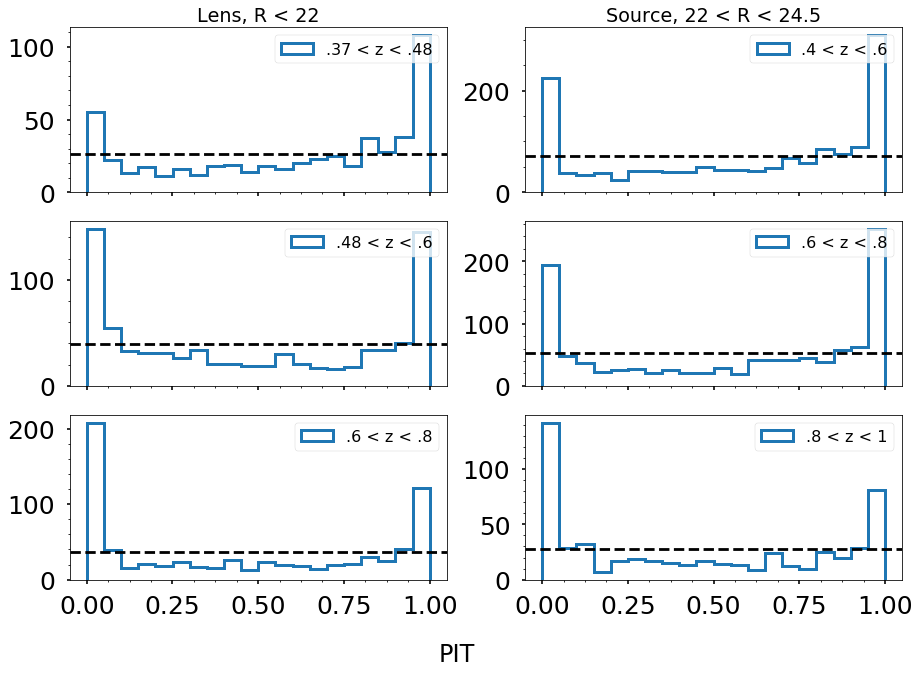

In [111]:
f, ax = plt.subplots(3, 2, sharex=True)

ax[0,0].hist(joined_df[joined_df['z_bin'] == 0]['pit'], histtype='step', bins=20, lw =3, label='.37 < z < .48');
ax[0,0].axhline(len(joined_df[joined_df['z_bin'] == 0])/20, ls='--', color='k')
ax[0,0].set_title('Lens, R < 22')

ax[1,0].hist(joined_df[joined_df['z_bin'] == 1]['pit'], histtype='step', bins=20, lw =3, label='.48 < z < .6');
ax[1,0].axhline(len(joined_df[joined_df['z_bin'] == 1])/20, ls='--', color='k')

ax[2,0].hist(joined_df[joined_df['z_bin'] == 2]['pit'], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[2,0].axhline(len(joined_df[joined_df['z_bin'] == 2])/20, ls='--', color='k')

ax[0,1].hist(joined_df[joined_df['z_bin'] == 3]['pit'], histtype='step', bins=20, lw =3, label='.4 < z < .6');
ax[0,1].axhline(len(joined_df[joined_df['z_bin'] == 3])/20, ls='--', color='k')
ax[0,1].set_title('Source, 22 < R < 24.5')

ax[1,1].hist(joined_df[joined_df['z_bin'] == 4]['pit'], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[1,1].axhline(len(joined_df[joined_df['z_bin'] == 4])/20, ls='--', color='k')

ax[2,1].hist(joined_df[joined_df['z_bin'] == 5]['pit'], histtype='step', bins=20, lw =3, label='.8 < z < 1');
ax[2,1].axhline(len(joined_df[joined_df['z_bin'] == 5])/20, ls='--', color='k')

for a in ax.ravel():
    a.legend()
plt.tight_layout()

f.text(0.5, -0.05, 'PIT', ha='center', fontsize=24)

KeyError: 'z_bin'

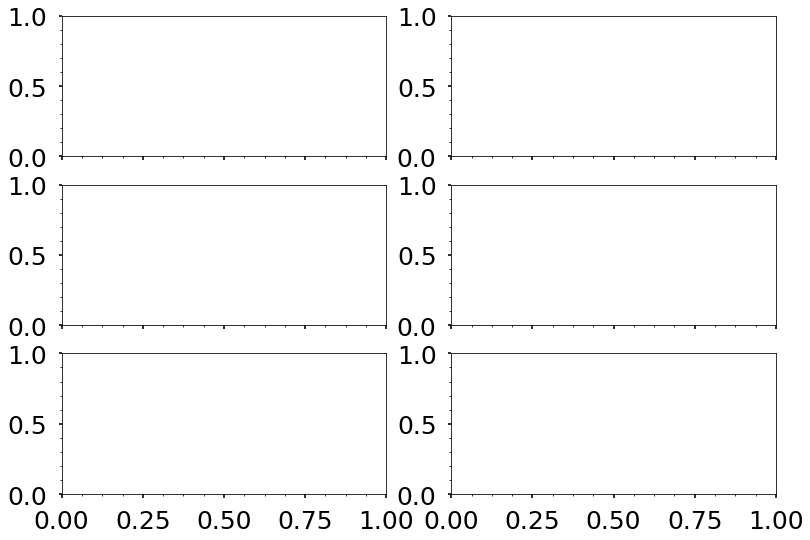

In [112]:
f, ax = plt.subplots(3, 2, sharex=True)

ax[0,0].hist(smoothed[smoothed['z_bin'] == 0]['pit'], histtype='step', bins=20, lw =3, label='.37 < z < .48');
ax[0,0].axhline(len(smoothed[smoothed['z_bin'] == 0])/20, ls='--', color='k')
ax[0,0].set_title('Lens, R < 22')

ax[1,0].hist(smoothed[smoothed['z_bin'] == 1]['pit'], histtype='step', bins=20, lw =3, label='.48 < z < .6');
ax[1,0].axhline(len(joined_df[joined_df['z_bin'] == 1])/20, ls='--', color='k')

ax[2,0].hist(smoothed[smoothed['z_bin'] == 2]['pit'], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[2,0].axhline(len(joined_df[joined_df['z_bin'] == 2])/20, ls='--', color='k')

ax[0,1].hist(smoothed[smoothed['z_bin'] == 3]['pit'], histtype='step', bins=20, lw =3, label='.4 < z < .6');
ax[0,1].axhline(len(smoothed[smoothed['z_bin'] == 3])/20, ls='--', color='k')
ax[0,1].set_title('Source, 22 < R < 24.5')

ax[1,1].hist(smoothed[smoothed['z_bin'] == 4]['pit'], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[1,1].axhline(len(joined_df[joined_df['z_bin'] == 4])/20, ls='--', color='k')

ax[2,1].hist(smoothed[smoothed['z_bin'] == 5]['pit'], histtype='step', bins=20, lw =3, label='.8 < z < 1');
ax[2,1].axhline(len(smoothed[smoothed['z_bin'] == 5])/20, ls='--', color='k')

for a in ax.ravel():
    a.legend()
plt.tight_layout()

f.text(0.5, -0.05, 'PIT', ha='center', fontsize=24)

In [106]:
from scipy.stats import entropy

In [107]:
def calc_ensemble_kl(df, key):
    hist, edges = np.histogram(df[key], bins=30, normed=True)
    uni_dens = np.ones(len(hist))
    kl = entropy(hist, uni_dens)
    return kl

In [110]:
calc_ensemble_kl(smoothed,'s_pit')

0.0680097977297546

In [109]:
calc_ensemble_kl(joined_df,'pit')

0.3666888117924741

# train by bin

In [55]:
primus_z = pd.read_csv('../catalogs/hectospec.tab', sep='\t')

m_s = primus_z['zerr.1'] > 0
m_s &= primus_z['Rdered'] > 22
m_s &= primus_z['Rdered'] < 24.5
m_s &= primus_z['isbest'] == 1
m_s &= primus_z['zconf'] > 2

m_l = primus_z['zerr.1'] > 0
m_l &= primus_z['Rdered'] > 20
m_l &= primus_z['Rdered'] < 22
m_l &= primus_z['isbest'] == 1
m_l &= primus_z['zconf'] > 2

In [56]:
lens_pz = pd.read_hdf('../catalogs/lens_pz.hdf','/data')
source_pz = pd.read_hdf('../catalogs/source_pz.hdf','/data')
source_pz = source_pz.rename(index=str, columns={"w1": "w4", "w2": "w5", "w3":"w6"})

joined_s = primus_z[m_s].set_index('objid').join(source_pz.set_index('objid'), lsuffix='_l', rsuffix='_r')

mm = joined_s['w4'] > .68
mm |= joined_s['w5'] >.68
mm |= joined_s['w6'] >.68
joined_s = joined_s[mm].copy()

joined_l = primus_z[m_l].set_index('objid').join(lens_pz.set_index('objid'), lsuffix='_l', rsuffix='_r')

mm = joined_l['w1'] > .68
mm |= joined_l['w2'] >.68
mm |= joined_l['w3'] >.68
joined_l = joined_l[mm].copy()

In [57]:
joined_df = pd.concat([joined_l, joined_s], sort=False)

In [58]:
print(len(joined_l), len(joined_s), len(joined_df))

1629 1411 3040


In [59]:
def calc_conv_pit(row, binwidth):
    spec_z = row['z']
    spec_z_idx = spec_z*100
    spec_z_idx = int(spec_z_idx)
    g = Gaussian1DKernel(stddev=binwidth)
    y = row['c0':'c499'].values
    z = convolve(y, g)
    
    
    pz = z[:spec_z_idx]
    pit = np.trapz(pz, x=np.arange(0, spec_z_idx))
    return pit

def calc_kl(binwidth, dataFrame, nbins=30):
    dataFrame = dataFrame.copy()
    dataFrame['conv_pit'] = dataFrame.apply(calc_conv_pit, axis=1, args=(binwidth,))
    hist, edges = np.histogram(dataFrame['conv_pit'], bins=nbins)
    uni_dens = len(joined_df)/nbins
    kl = (hist*np.log(hist/uni_dens)).sum()
    return kl

In [60]:
res = minimize(calc_kl, 4, args=(joined_df[joined_df['w1'] > .68],), method='Nelder-Mead')

In [61]:
res

 final_simplex: (array([[2.49375   ],
       [2.49365234]]), array([-817.49620905, -817.49620905]))
           fun: -817.4962090541279
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 19
        status: 0
       success: True
             x: array([2.49375])

In [62]:
res = minimize(calc_kl, 4, args=(joined_df[joined_df['w2'] > .68],), method='Nelder-Mead')

In [63]:
res

 final_simplex: (array([[4.103125  ],
       [4.10302734]]), array([-978.69930063, -978.69930063]))
           fun: -978.6993006284995
       message: 'Optimization terminated successfully.'
          nfev: 29
           nit: 12
        status: 0
       success: True
             x: array([4.103125])

In [64]:
res = minimize(calc_kl, 4, args=(joined_df[joined_df['w3'] > .68],), method='Nelder-Mead')

In [65]:
res

 final_simplex: (array([[5.        ],
       [5.00009766]]), array([-914.27681688, -914.27681688]))
           fun: -914.2768168800087
       message: 'Optimization terminated successfully.'
          nfev: 37
           nit: 15
        status: 0
       success: True
             x: array([5.])

In [66]:
res = minimize(calc_kl, 4, args=(joined_df[joined_df['w4'] > .68],), method='Nelder-Mead')

In [67]:
res

 final_simplex: (array([[4.475     ],
       [4.47509766]]), array([-933.82650181, -933.82650181]))
           fun: -933.826501810203
       message: 'Optimization terminated successfully.'
          nfev: 35
           nit: 13
        status: 0
       success: True
             x: array([4.475])

In [68]:
res = minimize(calc_kl, 4, args=(joined_df[joined_df['w5'] > .68],), method='Nelder-Mead')

In [69]:
res

 final_simplex: (array([[4.26875   ],
       [4.26865234]]), array([-848.87727668, -848.87727668]))
           fun: -848.8772766834755
       message: 'Optimization terminated successfully.'
          nfev: 33
           nit: 13
        status: 0
       success: True
             x: array([4.26875])

In [70]:
res = minimize(calc_kl, 4, args=(joined_df[joined_df['w6'] > .68],), method='Nelder-Mead')

In [71]:
res

 final_simplex: (array([[4.6       ],
       [4.60009766]]), array([-607.81295726, -607.81295726]))
           fun: -607.8129572578741
       message: 'Optimization terminated successfully.'
          nfev: 35
           nit: 14
        status: 0
       success: True
             x: array([4.6])

In [72]:
def conv_pz(row):
    spec_z = row['z']
    spec_z_idx = spec_z*100
    spec_z_idx = int(spec_z_idx)

    if np.isfinite(row['w1']) & (row['w1'] > .68):
        binwidth= 2.59
    elif np.isfinite(row['w2']) & (row['w2'] > .68):
        binwidth = 4.1
    elif np.isfinite(row['w3']) & (row['w3'] > .68):
        binwidth = 5.
    elif np.isfinite(row['w4']) & (row['w4'] > .68):
        binwidth = 4.475
    elif np.isfinite(row['w5']) & (row['w5'] > .68):
        binwidth = 4.269
    elif np.isfinite(row['w6']) & (row['w6'] > .68):
        binwidth = 4.6
    else:
        raise ValueError
    
    g = Gaussian1DKernel(stddev=binwidth)
    y = row['c0':'c499'].values
    z = convolve(y, g)
    return z

In [73]:
smoothed_df = joined_df.apply(conv_pz, axis=1)

In [74]:
def shift_nz(pz, dz):
    front_pad = np.zeros(dz)
    shifted=np.concatenate([front_pad, pz[:-dz]])
    return shifted

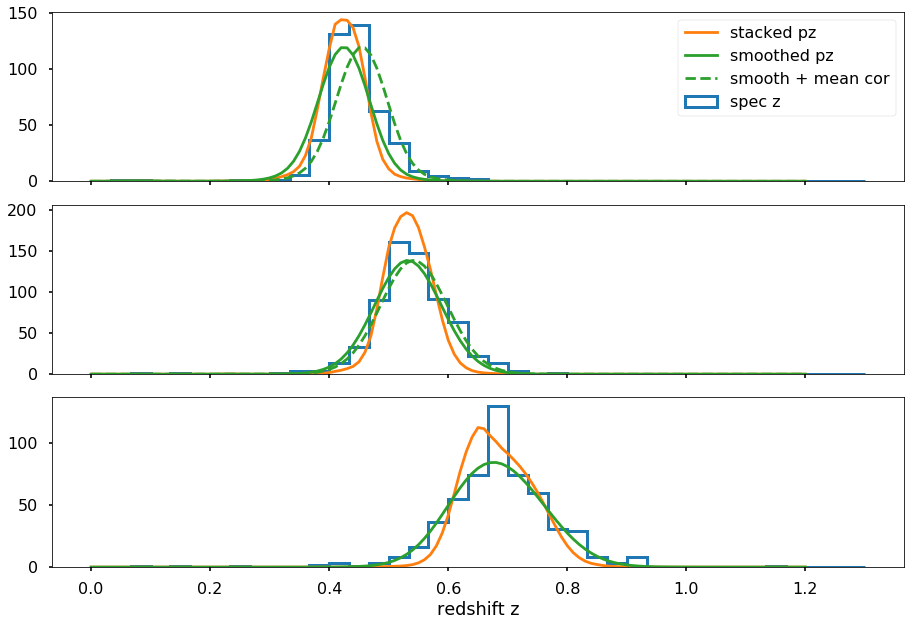

In [75]:
f, ax = plt.subplots(3, sharex=True)

z = (np.arange(121))*.01
ax[0].hist(joined_df[joined_df['w1'] > .68]['z'], bins=np.linspace(0,1.3,40), histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['w1'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, 3*sumed_pz, label='stacked pz')
ax[0].plot(z, 3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], label='smoothed pz')
ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w1'] > .68].sum(axis=0)[:121], 3), 'C2--', label='smooth + mean cor')
ax[0].legend()

ax[1].hist(joined_df[joined_df['w2'] > .68]['z'], bins=np.linspace(0,1.3,40), histtype='step', lw=3);
sumed_pz = joined_df[joined_df['w2'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, 3*sumed_pz)
ax[1].plot(z, 3*smoothed_df[joined_df['w2'] > .68].sum(axis=0)[:121])
ax[1].plot(z, shift_nz(3*smoothed_df[joined_df['w2'] > .68].sum(axis=0)[:121], 1), 'C2--')


ax[2].hist(joined_df[joined_df['w3'] > .68]['z'], bins=np.linspace(0,1.3,40), histtype='step', lw=3);
sumed_pz = joined_df[joined_df['w3'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[2].plot(z, 3*sumed_pz)
ax[2].plot(z, 3*smoothed_df[joined_df['w3'] > .68].sum(axis=0)[:121])
#ax[2].plot(z, 3*aa[joined_df['w3'] > .68].sum(axis=0)[:121], 'C2--')
ax[2].set_xlabel('redshift z')

plt.tight_layout()

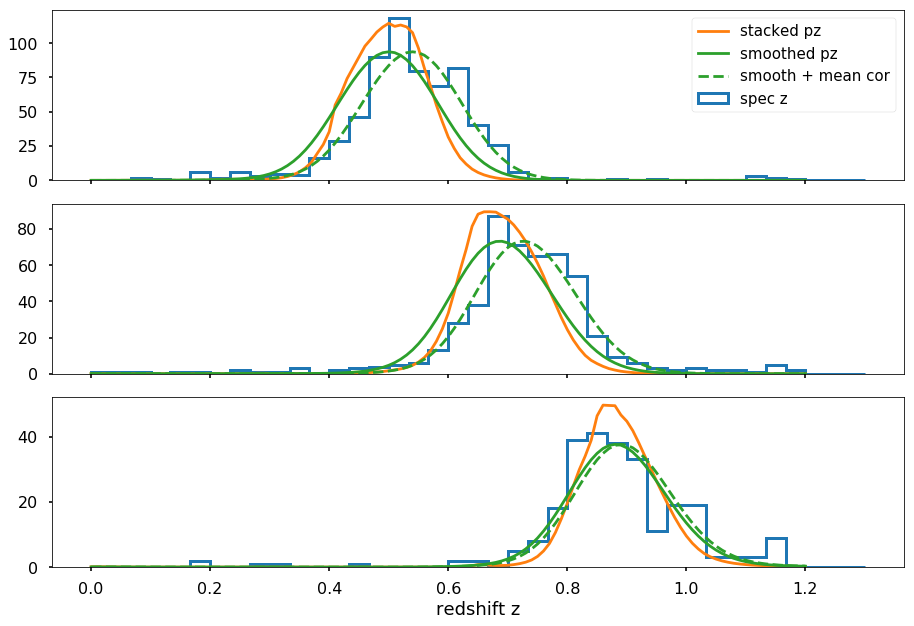

In [20]:
f, ax = plt.subplots(3, sharex=True)

z = (np.arange(121))*.01
ax[0].hist(joined_df[joined_df['w4'] > .68]['z'], bins=np.linspace(0,1.3,40), histtype='step', lw=3, label='spec z');
sumed_pz = joined_df[joined_df['w4'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[0].plot(z, 3*sumed_pz, label='stacked pz')
ax[0].plot(z, 3*smoothed_df[joined_df['w4'] > .68].sum(axis=0)[:121], label='smoothed pz')
ax[0].plot(z, shift_nz(3*smoothed_df[joined_df['w4'] > .68].sum(axis=0)[:121], 4), 'C2--', label='smooth + mean cor')
ax[0].legend(fontsize=15)

ax[1].hist(joined_df[joined_df['w5'] > .68]['z'], bins=np.linspace(0,1.3,40), histtype='step', lw=3);
sumed_pz = joined_df[joined_df['w5'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[1].plot(z, 3*sumed_pz)
ax[1].plot(z, 3*smoothed_df[joined_df['w5'] > .68].sum(axis=0)[:121])
ax[1].plot(z, shift_nz(3*smoothed_df[joined_df['w5'] > .68].sum(axis=0)[:121], 4), 'C2--')


ax[2].hist(joined_df[joined_df['w6'] > .68]['z'], bins=np.linspace(0,1.3,40), histtype='step', lw=3);
sumed_pz = joined_df[joined_df['w6'] > .68].loc[:,'c0':'c120'].sum(axis=0).values
ax[2].plot(z, 3*sumed_pz)
ax[2].plot(z, 3*smoothed_df[joined_df['w6'] > .68].sum(axis=0)[:121])
ax[2].plot(z, shift_nz(3*smoothed_df[joined_df['w6'] > .68].sum(axis=0)[:121], 1), 'C2--')
ax[2].set_xlabel('redshift z')

plt.tight_layout()

In [29]:
cols = joined_df.columns[40:540]

In [30]:
names = [c for c in cols]

In [31]:
ll = [a for a in smoothed_df.values]

In [32]:
smoothed = pd.DataFrame(ll, columns=names, index=smoothed_df.index.astype(int)).join(joined_df['z'])

ValueError: 464 columns passed, passed data had 500 columns

In [81]:
def calc_pit(row):
    spec_z = row['z']
    spec_z_str = spec_z*100
    spec_z_str = str(int(spec_z_str))
    pz = row['c0':'c'+spec_z_str]
    pit = np.trapz(pz, x=np.arange(0, len(row['c0':'c'+spec_z_str])))
    return pit

In [82]:
joined_df['pit'] = joined_df.apply(calc_pit, axis=1)
smoothed['s_pit'] = smoothed.apply(calc_pit, axis=1)

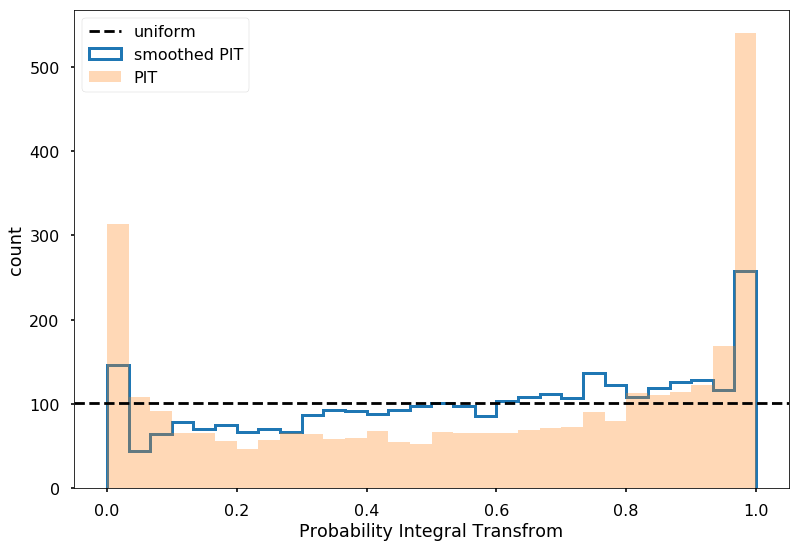

In [83]:
plt.hist(smoothed['s_pit'], histtype='step', bins=30, lw =3, label='smoothed PIT');
plt.hist(joined_df['pit'], bins=30, lw =3, alpha=.3, label='PIT');
plt.axhline(len(joined_df)/30, ls='--', color='k', label='uniform')
plt.xlabel('Probability Integral Transfrom')
plt.ylabel('count')
plt.legend()

In [84]:
#joined_df = joined_df.drop('s_pit', axis=1)

In [85]:
joined_df = joined_df.join(smoothed.loc[:,'s_pit'])

Text(0.5,-0.05,'PIT')

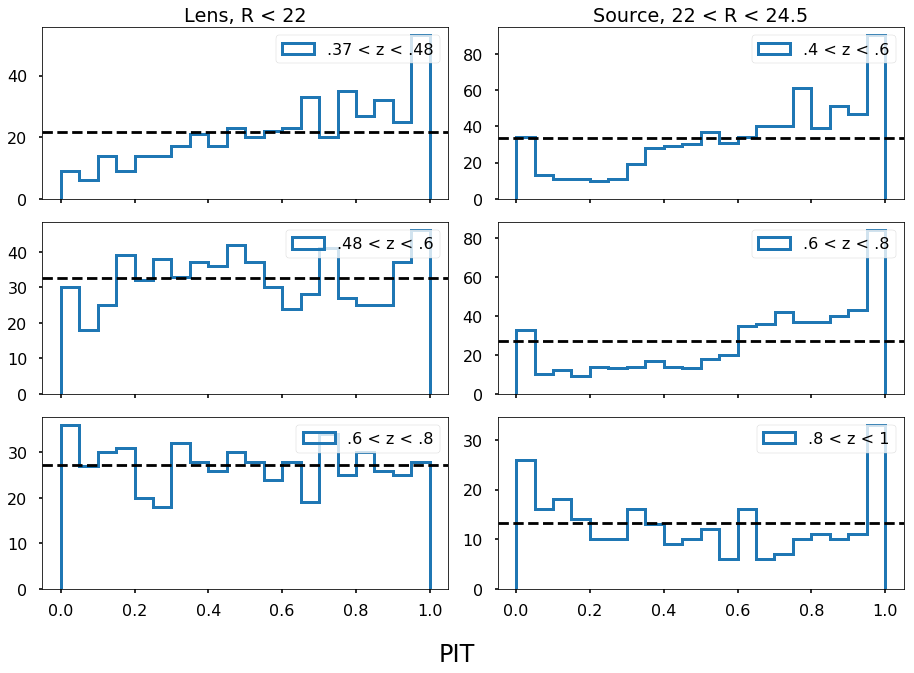

In [86]:
f, ax = plt.subplots(3, 2, sharex=True)

m = joined_df['w1'] > .68
ax[0,0].hist(joined_df['s_pit'][m], histtype='step', bins=20, lw =3, label='.37 < z < .48');
ax[0,0].axhline(len(joined_df[m])/20, ls='--', color='k')
ax[0,0].set_title('Lens, R < 22')

m = joined_df['w2'] > .68
ax[1,0].hist(joined_df['s_pit'][m], histtype='step', bins=20, lw =3, label='.48 < z < .6');
ax[1,0].axhline(len(joined_df[m])/20, ls='--', color='k')

m = joined_df['w3'] > .68
ax[2,0].hist(joined_df['s_pit'][m], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[2,0].axhline(len(joined_df[m])/20, ls='--', color='k')

m = joined_df['w4'] > .68
ax[0,1].hist(joined_df['s_pit'][m], histtype='step', bins=20, lw =3, label='.4 < z < .6');
ax[0,1].axhline(len(joined_df[m])/20, ls='--', color='k')
ax[0,1].set_title('Source, 22 < R < 24.5')

m = joined_df['w5'] > .68
ax[1,1].hist(joined_df['s_pit'][m], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[1,1].axhline(len(joined_df[m])/20, ls='--', color='k')


m = joined_df['w6'] > .68
ax[2,1].hist(joined_df['s_pit'][m], histtype='step', bins=20, lw =3, label='.8 < z < 1');
ax[2,1].axhline(len(joined_df[m])/20, ls='--', color='k')

for a in ax.ravel():
    a.legend()
plt.tight_layout()

f.text(0.5, -0.05, 'PIT', ha='center', fontsize=24)

Text(0.5,-0.05,'PIT')

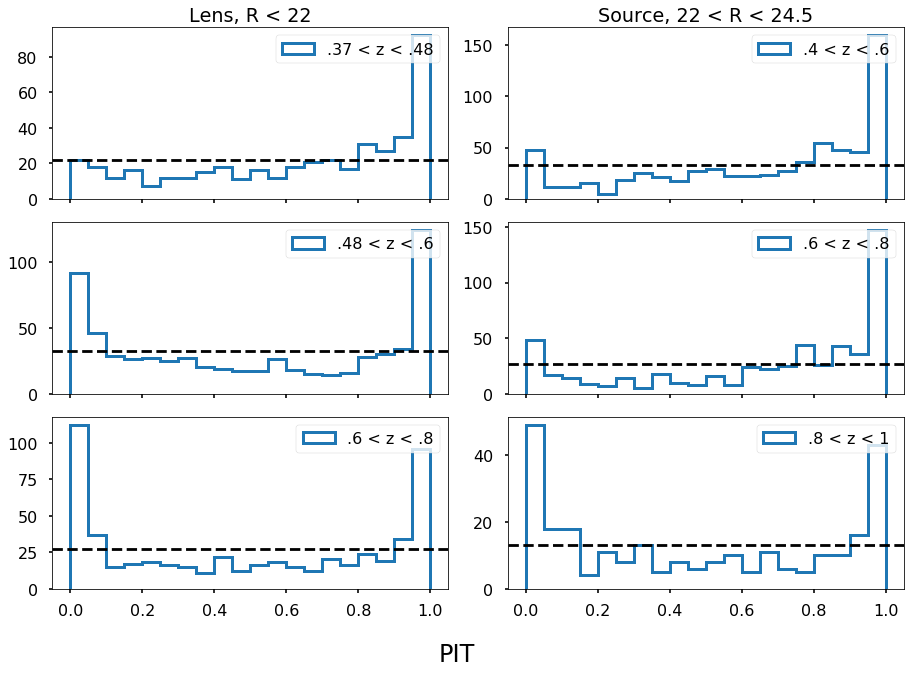

In [87]:
f, ax = plt.subplots(3, 2, sharex=True)

m = joined_df['w1'] > .68
ax[0,0].hist(joined_df['pit'][m], histtype='step', bins=20, lw =3, label='.37 < z < .48');
ax[0,0].axhline(len(joined_df[m])/20, ls='--', color='k')
ax[0,0].set_title('Lens, R < 22')

m = joined_df['w2'] > .68
ax[1,0].hist(joined_df['pit'][m], histtype='step', bins=20, lw =3, label='.48 < z < .6');
ax[1,0].axhline(len(joined_df[m])/20, ls='--', color='k')

m = joined_df['w3'] > .68
ax[2,0].hist(joined_df['pit'][m], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[2,0].axhline(len(joined_df[m])/20, ls='--', color='k')

m = joined_df['w4'] > .68
ax[0,1].hist(joined_df['pit'][m], histtype='step', bins=20, lw =3, label='.4 < z < .6');
ax[0,1].axhline(len(joined_df[m])/20, ls='--', color='k')
ax[0,1].set_title('Source, 22 < R < 24.5')

m = joined_df['w5'] > .68
ax[1,1].hist(joined_df['pit'][m], histtype='step', bins=20, lw =3, label='.6 < z < .8');
ax[1,1].axhline(len(joined_df[m])/20, ls='--', color='k')


m = joined_df['w6'] > .68
ax[2,1].hist(joined_df['pit'][m], histtype='step', bins=20, lw =3, label='.8 < z < 1');
ax[2,1].axhline(len(joined_df[m])/20, ls='--', color='k')

for a in ax.ravel():
    a.legend()
plt.tight_layout()

f.text(0.5, -0.05, 'PIT', ha='center', fontsize=24)

In [88]:
calc_ensemble_kl(joined_df,'s_pit')

0.06270118069480572

In [89]:
calc_ensemble_kl(joined_df,'pit')

0.2757782087896471

# Correlations

In [3]:
import twopoint

In [4]:
tfile = twopoint.TwoPointFile.from_fits('dls_broad_masked_full_2pt.fits')

In [5]:
tfile.spectra

[<Spectrum: XIP>, <Spectrum: XIM>, <Spectrum: GAMMAT>, <Spectrum: WTHETA>]

In [6]:
path = 'DLS_corrs/'
cosdir = '/global/cscratch1/sd/ihasan/cosmosis/dls'
#cosdir = '/global/cscratch1/sd/ihasan/cosmosis/pub_2pt/'
#cosdir_smooth = '/global/cscratch1/sd/ihasan/cosmosis/pub_2pt_smooth//'
flask_path = '/global/cscratch1/sd/ihasan/flask/output/10748/'

In [7]:
costheta = pd.read_csv(join(cosdir,'galaxy_xi/theta.txt'), names=['theta'], header=1)['theta'].values*u.rad

In [8]:
mask_theta = costheta.to(u.arcmin) > 1*u.arcmin 
mask_theta &= costheta.to(u.arcmin) < 90*u.arcmin

In [8]:
gg_c = {}
for i in range(4,7):
    for j in range(4,7):
        if i < j:
            pass
        else:
#            print(i,j)
            gg_c['{}{}'.format(i-4,j-4)] = pd.read_csv(join(cosdir,'shear_xi_plus/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)
    
gg_c_s = {}
for i in range(4,7):
    for j in range(4,7):
        if i < j:
            pass
        else:
#            print(i,j)
            gg_c_s['{}{}'.format(i-4,j-4)] = pd.read_csv(join(cosdir_smooth,'shear_xi_plus/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)

FileNotFoundError: [Errno 2] File /global/cscratch1/sd/ihasan/cosmosis/dls/shear_xi_plus/bin_4_4.txt does not exist: '/global/cscratch1/sd/ihasan/cosmosis/dls/shear_xi_plus/bin_4_4.txt'

In [9]:
gg = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            gg['{}{}'.format(i,j)] = pd.read_csv(path+'{}{}_gg.csv'.format(i,j))
            
            
gg_f = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            gg_f['{}{}'.format(i,j)] = pd.read_csv(flask_path+'{}{}_gg.csv'.format(i,j))

FileNotFoundError: [Errno 2] File /global/cscratch1/sd/ihasan/flask/output/10748/00_gg.csv does not exist: '/global/cscratch1/sd/ihasan/flask/output/10748/00_gg.csv'

NameError: name 'gg_c' is not defined

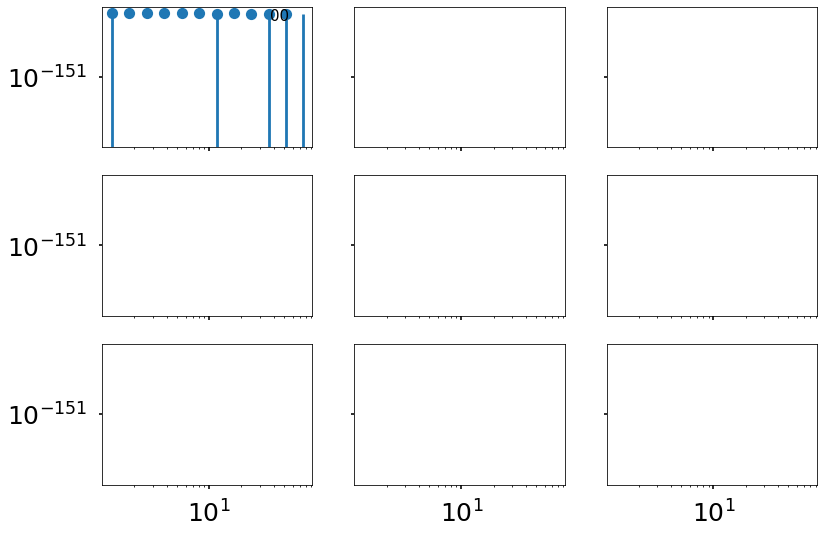

In [10]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
            ax[i,j].axis('off')
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C0o')
            ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[i,j].set_yscale('log')
            ax[i,j].set_xscale('log')
            ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c['{}{}'.format(i,j)][mask_theta])
            ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c_s['{}{}'.format(i,j)][mask_theta],
                        ls='--')

            #corr = gg_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C1v')



ax[1,0].set_ylabel(r'$\xi_+$')
ax[1,0].set_ylabel(r'$\xi_+$')
ax[1,0].set_xlim([1,110])
ax[1,0].set_ylim([3e-9,1e-3])
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
#plt.savefig('xi+.png', transparent = True)

In [11]:
gg['00']

,Unnamed: 0,xip,xim,r,sig
0,0,1.000183e-04,2.348227e-05,3.817495,0.000049
1,1,3.838801e-05,-1.393751e-05,5.851734,0.000032
2,2,2.781900e-05,1.873666e-05,8.949553,0.000022
3,3,3.273094e-05,9.621386e-06,13.679567,0.000015
4,4,1.523257e-05,1.197620e-05,20.895121,0.000010
5,5,4.328309e-06,7.025739e-06,31.891458,0.000007
6,6,1.620394e-06,7.384915e-07,48.538920,0.000005
7,7,-6.761456e-07,-5.397122e-08,73.285790,0.000004


In [11]:
ggm_c = {}
for i in range(4,7):
    for j in range(4,7):
        if i < j:
            pass
        else:
#            print(i,j)
            ggm_c['{}{}'.format(i-4,j-4)] = pd.read_csv(join(cosdir,'shear_xi_minus/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)
    
ggm_c_s = {}
for i in range(4,7):
    for j in range(4,7):
        if i < j:
            pass
        else:
#            print(i,j)
            ggm_c_s['{}{}'.format(i-4,j-4)] = pd.read_csv(join(cosdir_smooth,'shear_xi_minus/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)

FileNotFoundError: [Errno 2] File /global/cscratch1/sd/ihasan/cosmosis/dls/shear_xi_minus/bin_4_4.txt does not exist: '/global/cscratch1/sd/ihasan/cosmosis/dls/shear_xi_minus/bin_4_4.txt'

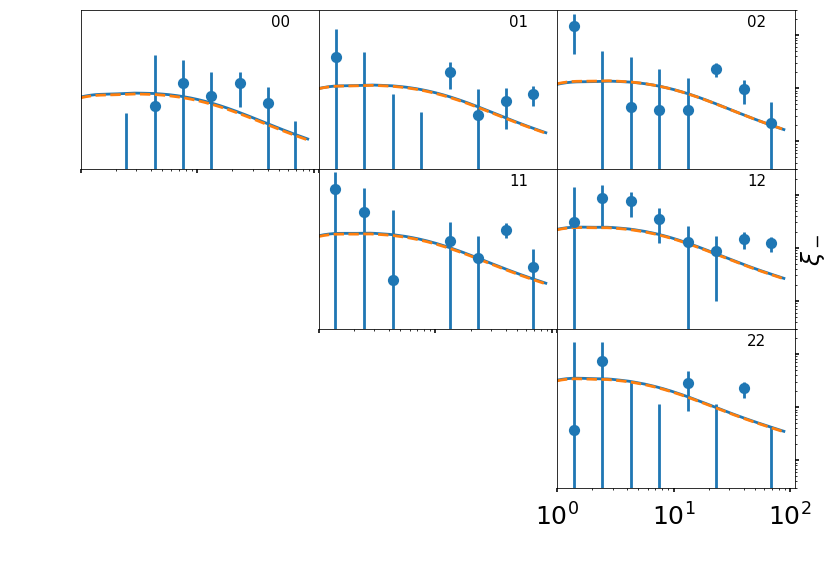

In [30]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
#            ax[i,j].axis('off')
            pass
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[j,i].errorbar(corr['r'], corr['xim'], yerr=corr['sig'],fmt='C0o')
            ax[j,i].annotate('{}{}'.format(j,i), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[j,i].set_yscale('log')
            ax[j,i].set_xscale('log')
            ax[j,i].yaxis.set_label_position("right")
            ax[j,i].yaxis.tick_right()
            ax[j,i].plot(costheta[mask_theta].to(u.arcmin), ggm_c['{}{}'.format(i,j)][mask_theta])
            ax[j,i].plot(costheta[mask_theta].to(u.arcmin), ggm_c_s['{}{}'.format(i,j)][mask_theta],
                        ls='--')
            
            #corr = gg_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C1v')


ax[1,0].axis('off')            
ax[2,0].axis('off')
ax[2,1].axis('off')

ax[1,2].set_ylabel(r'$\xi_-$')
#ax[1,1].yaxis.set_label_position("right")
#ax[1,2].yaxis.tick_right()

#ax[0,0].set_ylabel(r'$\xi_-$')
ax[0,0].set_xlim([1,110])
ax[0,1].set_ylim([3e-7,3e-4])
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('xi-.png', transparent = True)

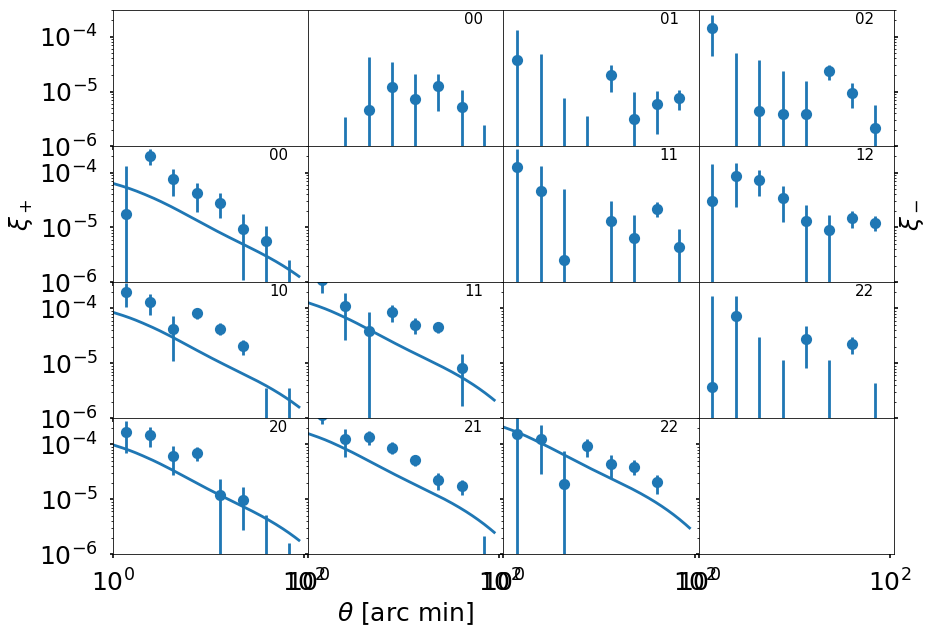

In [31]:
f, ax = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(14,10))

for i in range(0,3):
    for j in range(0,3):
        if j > i :
#            ax[i,j].axis('off')
            pass
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[i + 1,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C0o')
            ax[i + 1,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[i + 1,j].set_yscale('log')
            ax[i + 1,j].set_xscale('log')
            ax[i + 1,j].plot(costheta[mask_theta].to(u.arcmin), gg_c['{}{}'.format(i,j)][mask_theta])
            
            #corr = gg_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C1v')


            
for i in range(0,3):
    for j in range(0,3):
        if j > i :
#            ax[i,j].axis('off')
            pass
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[j,i + 1].errorbar(corr['r'], corr['xim'], yerr=corr['sig'],fmt='C0o')
            ax[j,i + 1].annotate('{}{}'.format(j,i), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[j,i + 1].set_yscale('log')
            ax[j,i + 1].set_xscale('log')
            ax[j,i + 1].yaxis.set_label_position("right")
            ax[j,i + 1].yaxis.tick_right()



ax[1,0].set_ylabel(r'$\xi_+$')
ax[1,3].set_ylabel(r'$\xi_-$')
ax[1,0].set_ylabel(r'$\xi_+$')
ax[1,0].set_xlim([1,110])
ax[3,3].set_ylim([1e-6,3e-4])
ax[3,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('xi+-.png', transparent = True)

In [18]:
mm_c = {}
for i in range(1,4):
    for j in range(1,4):
        if i < j:
            pass
        else:
#            print(i,j)
            mm_c['{}{}'.format(i-1,j-1)] = pd.read_csv(join(cosdir,'galaxy_xi/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)
    
mm_c_s = {}
for i in range(1,4):
    for j in range(1,4):
        if i < j:
            pass
        else:
#            print(i,j)
            mm_c_s['{}{}'.format(i-1,j-1)] = pd.read_csv(join(cosdir_smooth,'galaxy_xi/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)

NameError: name 'cosdir_smooth' is not defined

In [15]:
mm = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            mm['{}{}'.format(i,j)] = pd.read_csv(path+'{}{}_mm.csv'.format(i,j))
            
mm_f = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            mm_f['{}{}'.format(i,j)] = pd.read_csv(flask_path+'{}{}_mm.csv'.format(i,j))

In [8]:
mask_theta = costheta.to(u.arcmin) > 1*u.arcmin 
mask_theta &= costheta.to(u.arcmin) < 90*u.arcmin

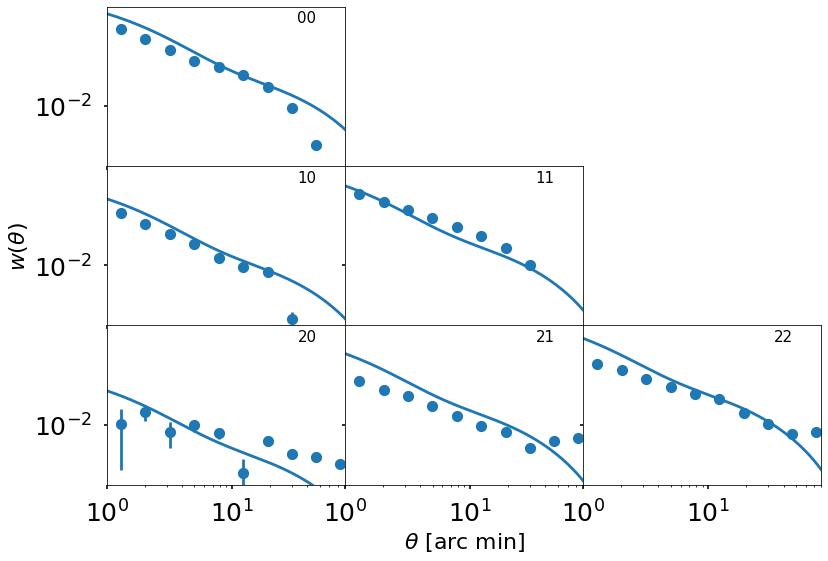

In [9]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
            ax[i,j].axis('off')
        else:
            corr = mm['{}{}'.format(i,j)]
            ax[i,j].errorbar(corr['r'], corr['xi'], yerr=corr['sig'], fmt='C0o')
            ax[i,j].set_yscale('log')
            ax[i,j].set_xscale('log')
#            ax[i,j].set_ylim([0,5])
            ax[i,j].set_xlim([1,80])
            ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
                         mm_c['{}{}'.format(i,j)][mask_theta]['xi'].values)
#            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
#                         mm_c_s['{}{}'.format(i,j)][mask_theta]['xi'].values, ls='--')
            #corr = mm_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xi'], yerr=corr['sig'], fmt='C1v')


ax[1,0].set_ylabel(r'$w(\theta)$', size=22)
ax[2,1].set_xlabel(r'$\theta$ [arc min]', size=22)
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('w_cosmo.png', transparent=True)

In [12]:
gg = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            gg['{}{}'.format(i,j)] = pd.read_csv(path+'{}{}_gg.csv'.format(i,j))

In [13]:
gg_c = {}
for i in range(0,3):
    for j in range(0,3):
        if i < j:
            pass
        else:
#            print(i,j)
            gg_c['{}{}'.format(i,j)] = pd.read_csv(join(cosdir,'shear_xi_plus/bin_{}_{}.txt'.format(i+1,j+1)),
                                                       names=['xi'], header=0)

In [27]:
ggm_c = {}
for i in range(0,3):
    for j in range(0,3):
        if i < j:
            pass
        else:
#            print(i,j)
            ggm_c['{}{}'.format(i,j)] = pd.read_csv(join(cosdir,'shear_xi_minus/bin_{}_{}.txt'.format(i+1,j+1)),
                                                       names=['xi'], header=0)

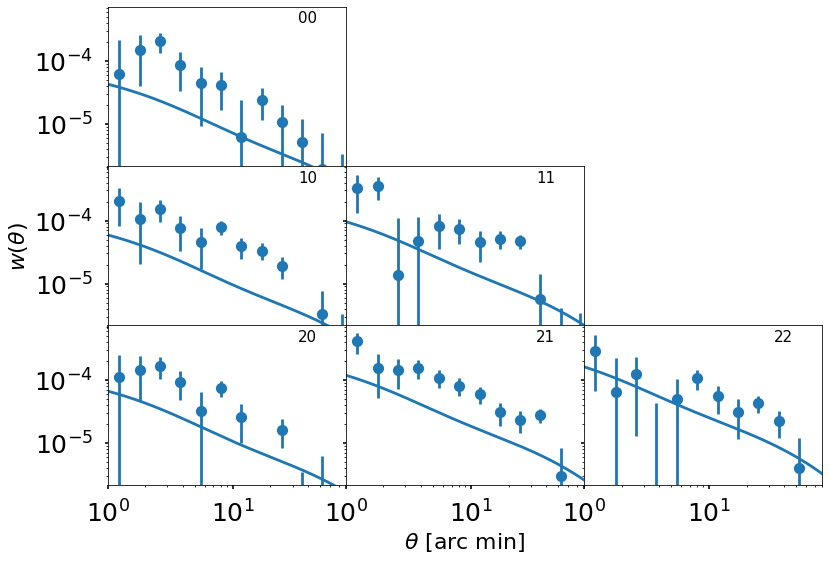

In [14]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
            ax[i,j].axis('off')
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'], fmt='C0o')
            ax[i,j].set_yscale('log')
            ax[i,j].set_xscale('log')
#            ax[i,j].set_ylim([0,5])
            ax[i,j].set_xlim([1,80])
            ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
                         gg_c['{}{}'.format(i,j)][mask_theta]['xi'].values)
#            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
#                         mm_c_s['{}{}'.format(i,j)][mask_theta]['xi'].values, ls='--')
            #corr = mm_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xi'], yerr=corr['sig'], fmt='C1v')


ax[1,0].set_ylabel(r'$w(\theta)$', size=22)
ax[2,1].set_xlabel(r'$\theta$ [arc min]', size=22)
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
#plt.savefig('w_cosmo.png', transparent=True)

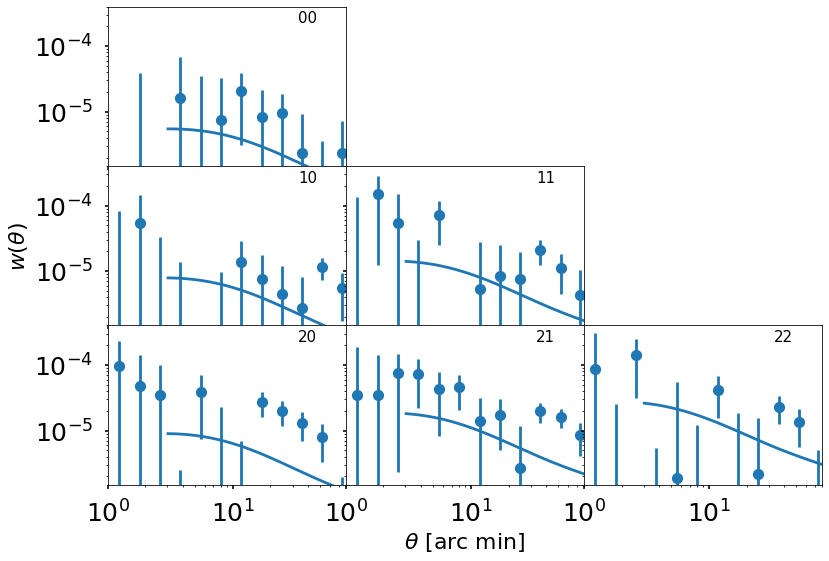

In [28]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
            ax[i,j].axis('off')
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(corr['r'], corr['xim'], yerr=corr['sig'], fmt='C0o')
            ax[i,j].set_yscale('log')
            ax[i,j].set_xscale('log')
#            ax[i,j].set_ylim([0,5])
            ax[i,j].set_xlim([1,80])
            ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
                         ggm_c['{}{}'.format(i,j)][mask_theta]['xi'].values)
#            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
#                         mm_c_s['{}{}'.format(i,j)][mask_theta]['xi'].values, ls='--')
            #corr = mm_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xi'], yerr=corr['sig'], fmt='C1v')


ax[1,0].set_ylabel(r'$w(\theta)$', size=22)
ax[2,1].set_xlabel(r'$\theta$ [arc min]', size=22)
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
#plt.savefig('w_cosmo.png', transparent=True)

In [12]:
corr

,Unnamed: 0,xip,xim,r,sig
0,0,0.000018,-0.000184,1.390270,0.000112
1,1,0.000203,-0.000062,2.447960,0.000066
2,2,0.000076,0.000005,4.296686,0.000038
3,3,0.000042,0.000012,7.536420,0.000022
4,4,0.000028,0.000007,13.205771,0.000013
5,5,0.000009,0.000012,23.092387,0.000008
6,6,0.000006,0.000005,40.249689,0.000005
7,7,-0.000001,-0.000001,68.969523,0.000004


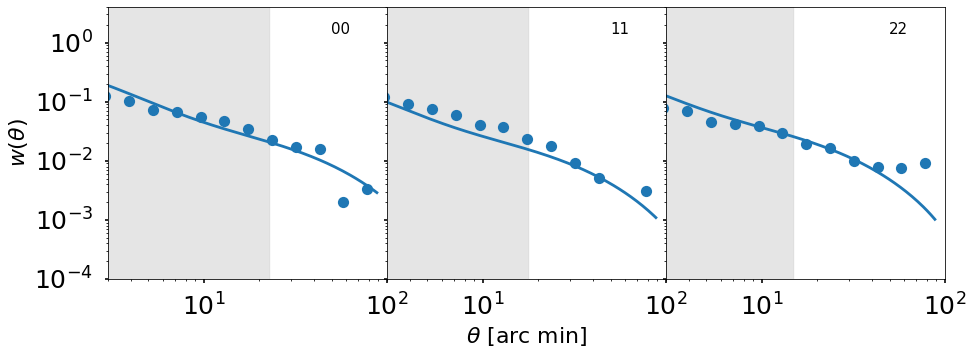

In [19]:
f, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))

# integral constraint
ic = [0.00961912, 0.001272284, 0.00117755]
ang_cut = [23,18,15]

for i in range(0,3):
        corr = mm['{}{}'.format(i,i)]
        yerr = tfile.spectra[3].get_error(i+1,i+1)
        ax[i].errorbar(corr['r'], corr['xi'] + ic[i], fmt='C0o') #yerr=yerr
        ax[i].set_yscale('log')
        ax[i].set_xscale('log')
#            ax[i,j].set_ylim([0,5])
        ax[i].set_xlim([3,100])
        ax[i].annotate('{}{}'.format(i,i), xy=(.8,.9), xycoords='axes fraction', size=15)
        ax[i].plot(costheta[mask_theta].to(u.arcmin),
                    mm_c['{}{}'.format(i,i)][mask_theta]['xi'].values)
        ax[i].fill_between([0,ang_cut[i]], 4, 0, alpha=.1, color='k')
        ax[i].set_ylim([10**-4,4])

#            ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
#                         mm_c_s['{}{}'.format(i,j)][mask_theta]['xi'].values, ls='--')
            #corr = mm_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xi'], yerr=corr['sig'], fmt='C1v')


ax[0].set_ylabel(r'$w(\theta)$', size=22)
ax[1].set_xlabel(r'$\theta$ [arc min]', size=22)
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
#plt.savefig('w_cosmo.png', transparent=True)

In [20]:
mask_theta = costheta.to(u.arcmin) > 3*u.arcmin 
mask_theta &= costheta.to(u.arcmin) < 90*u.arcmin

In [21]:
gm = {}
for i in range(0,3):
    for j in range(0,3):
        gm['{}{}'.format(i,j)] = pd.read_csv(path+'{}{}_gm.csv'.format(i,j))

In [22]:
gm_c = {}
for i in range(1,4):
    for j in range(1,4):
#            print(i,j)
            gm_c['{}{}'.format(i-1,j-1)] = pd.read_csv(join(cosdir,'galaxy_shear_xi/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)

In [12]:
gm_c = {}
for i in range(1,4):
    for j in range(4,7):
#            print(i,j)
            gm_c['{}{}'.format(i-1,j-4)] = pd.read_csv(join(cosdir,'galaxy_shear_xi/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)
    
gm_c_s = {}
for i in range(1,4):
    for j in range(4,7):
#            print(i,j)
            gm_c_s['{}{}'.format(i-1,j-4)] = pd.read_csv(join(cosdir_smooth,'galaxy_shear_xi/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)

FileNotFoundError: [Errno 2] File /global/cscratch1/sd/ihasan/cosmosis/dls/galaxy_shear_xi/bin_1_4.txt does not exist: '/global/cscratch1/sd/ihasan/cosmosis/dls/galaxy_shear_xi/bin_1_4.txt'

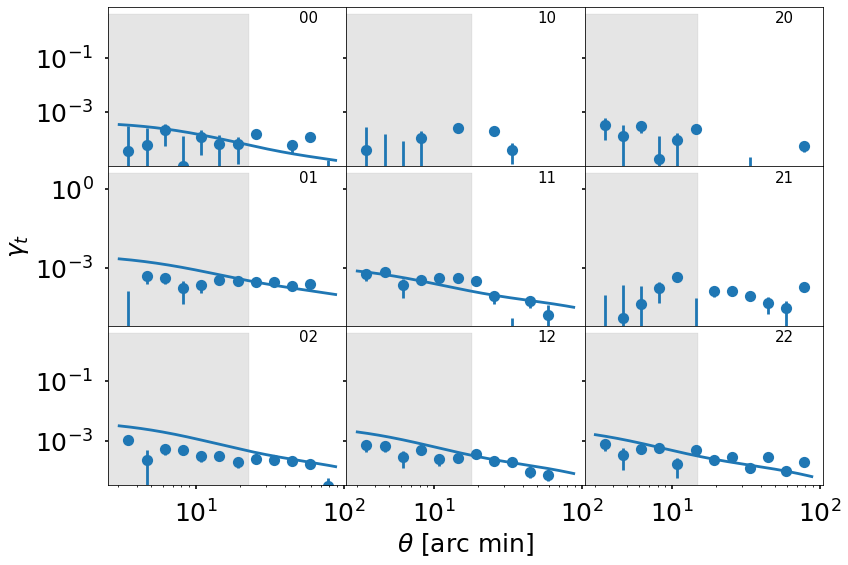

In [23]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row')

for i in range(0,3):
    for j in range(0,3):
        corr = gm['{}{}'.format(i,j)]
        ax[j,i].errorbar(corr['r'], corr['xi+'], yerr=corr['sig'], fmt='C0o')
        ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c['{}{}'.format(i,j)][mask_theta])
#        ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c_s['{}{}'.format(i,j)][mask_theta],
#                    ls='--')

        ax[j,i].set_yscale('log', nonposy='clip')
        ax[j,i].set_xscale('log')
#        ax[j,i].set_ylim([2*10**-6, .002])
        ax[j,i].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
        ax[j,i].fill_between([0,ang_cut[i]], 4, 0, alpha=.1, color='k')
ax[1,0].set_ylabel(r'$\gamma_t$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('gammat_cosmo.png', trasparent=True)

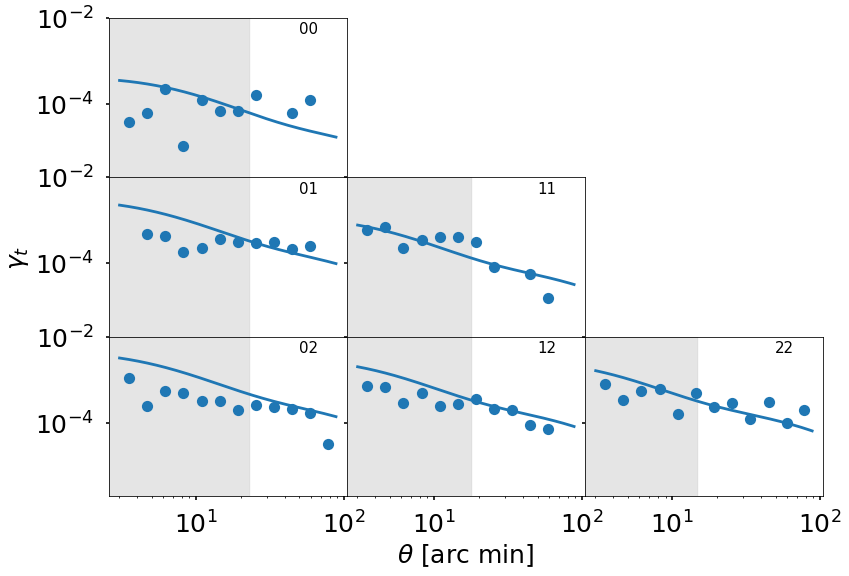

In [25]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row')

for i in range(0,3):
    for j in range(0,3):
        if i > j:
            ax[j,i].axis('off')
        else:
            corr = gm['{}{}'.format(i,j)]
            yerr = tfile.spectra[2].get_error(i,j)
            ax[j,i].errorbar(corr['r'], corr['xi+'], fmt='C0o')
            ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c['{}{}'.format(i,j)][mask_theta])
    #        ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c_s['{}{}'.format(i,j)][mask_theta],
    #                    ls='--')

            ax[j,i].set_yscale('log', nonposy='clip')
            ax[j,i].set_xscale('log')
            ax[j,i].set_ylim([2*10**-6, .01])
            ax[j,i].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            ax[j,i].fill_between([0,ang_cut[i]], .01, 0, alpha=.1, color='k')
ax[1,0].set_ylabel(r'$\gamma_t$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('gammat_cosmo.png', trasparent=True)

In [15]:
import glob

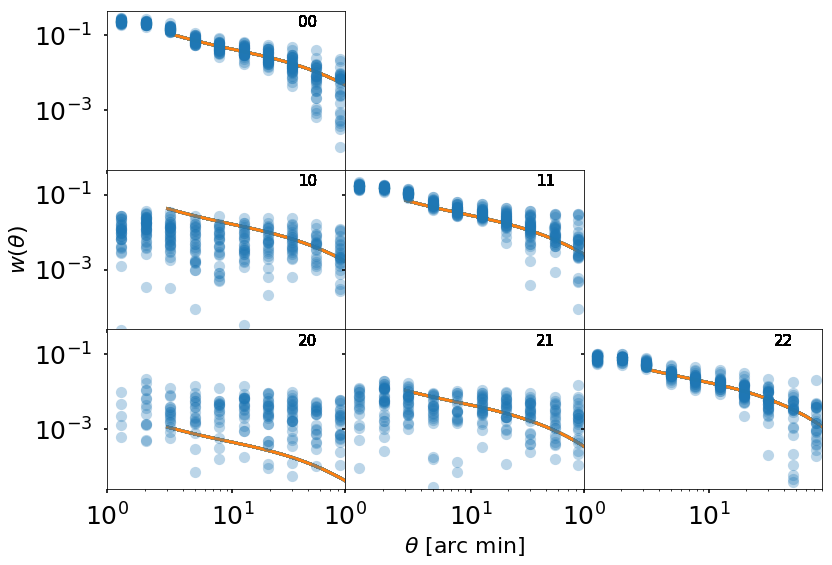

In [23]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

files = glob.glob('/global/cscratch1/sd/ihasan/flask/output/*')
for f in files:
    mm_f = {}
    for i in range(0,3):
        for j in range(0,3):
            if j > i:
                pass
            else:
                mm_f['{}{}'.format(i,j)] = pd.read_csv(f+'/{}{}_mm.csv'.format(i,j))

    for i in range(0,3):
        for j in range(0,3):
            if j > i :
                ax[i,j].axis('off')
            else:
                corr = mm_f['{}{}'.format(i,j)]
                ax[i,j].errorbar(corr['r'], corr['xi'], fmt='C0o', alpha=.3)
                ax[i,j].set_yscale('log')
                ax[i,j].set_xscale('log')
    #            ax[i,j].set_ylim([0,5])
                ax[i,j].set_xlim([1,80])
                ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
                ax[i,j].plot(costheta[mask_theta].to(u.arcmin),
                             mm_c['{}{}'.format(i,j)][mask_theta]['xi'].values)
                corr = mm_f['{}{}'.format(i,j)]


ax[1,0].set_ylabel(r'$w(\theta)$', size=22)
ax[2,1].set_xlabel(r'$\theta$ [arc min]', size=22)
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('w.png')

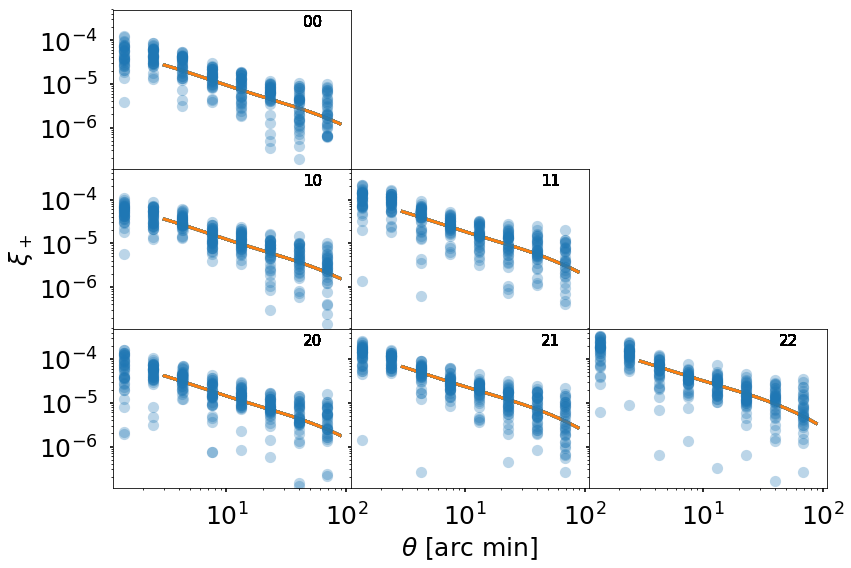

In [24]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

files = glob.glob('/global/cscratch1/sd/ihasan/flask/output/*')
for f in files:

    gg_f = {}
    for i in range(0,3):
        for j in range(0,3):
            if j > i:
                pass
            else:
                gg_f['{}{}'.format(i,j)] = pd.read_csv(f+'/{}{}_gg.csv'.format(i,j))

    for i in range(0,3):
        for j in range(0,3):
            if j > i :
                ax[i,j].axis('off')
            else:
                corr = gg_f['{}{}'.format(i,j)]
                ax[i,j].errorbar(corr['r'], corr['xip'], fmt='C0o', alpha=.3)
                ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
                ax[i,j].set_yscale('log')
                ax[i,j].set_xscale('log')
                ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c['{}{}'.format(i,j)][mask_theta])

                corr = gg_f['{}{}'.format(i,j)]


ax[1,0].set_ylabel(r'$\xi_+$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('xi+.png')

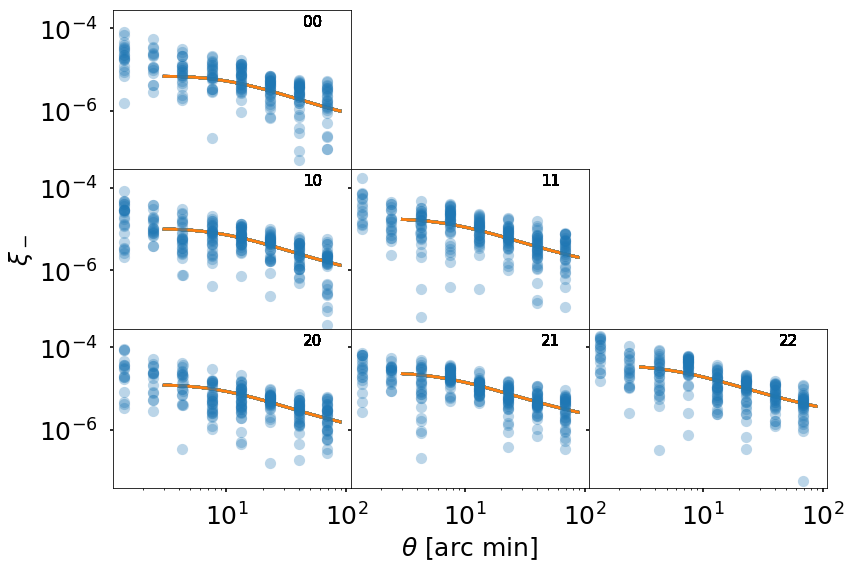

In [25]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

files = glob.glob('/global/cscratch1/sd/ihasan/flask/output/*')
for f in files:

    gg_f = {}
    for i in range(0,3):
        for j in range(0,3):
            if j > i:
                pass
            else:
                gg_f['{}{}'.format(i,j)] = pd.read_csv(f+'/{}{}_gg.csv'.format(i,j))

    for i in range(0,3):
        for j in range(0,3):
            if j > i :
                ax[i,j].axis('off')
            else:
                corr = gg_f['{}{}'.format(i,j)]
                ax[i,j].errorbar(corr['r'], corr['xim'], fmt='C0o', alpha=.3)
                ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
                ax[i,j].set_yscale('log')
                ax[i,j].set_xscale('log')
                ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c_m['{}{}'.format(i,j)][mask_theta])

                corr = gg_f['{}{}'.format(i,j)]


ax[1,0].set_ylabel(r'$\xi_-$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('xi-.png')

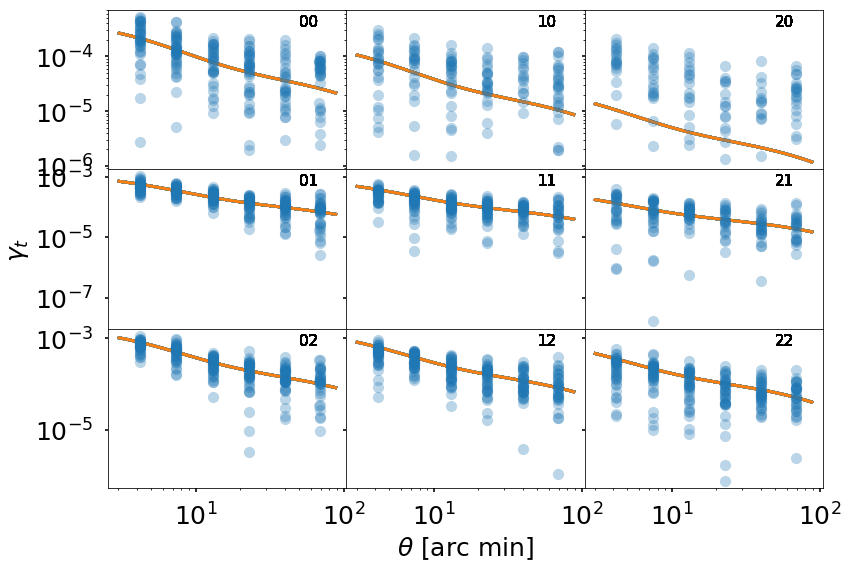

In [19]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row')

files = glob.glob('/global/cscratch1/sd/ihasan/flask/output/*')
for f in files:

    gm_f = {}
    for i in range(0,3):
        for j in range(0,3):
            gm_f['{}{}'.format(i,j)] = pd.read_csv(f+'/{}{}_gm.csv'.format(i,j))

    for i in range(0,3):
        for j in range(0,3):
            corr = gm_f['{}{}'.format(i,j)]
            ax[j,i].errorbar(corr['r'], -1*corr['xi+'], fmt='C0o', alpha=.3)
            ax[j,i].plot(costheta[mask_theta].to(u.arcmin),
                         gm_c['{}{}'.format(i,j)][mask_theta].values.flatten())
            ax[j,i].set_yscale('log', nonposy='clip')
            ax[j,i].set_xscale('log')
            #ax[j,i].set_ylim([7*10**-6, .002])
            ax[j,i].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)

ax[1,0].set_ylabel(r'$\gamma_t$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('gammat.png')

/global/cscratch1/sd/ihasan/flask/output/24524
/global/cscratch1/sd/ihasan/flask/output/18743
/global/cscratch1/sd/ihasan/flask/output/2468
/global/cscratch1/sd/ihasan/flask/output/20315
/global/cscratch1/sd/ihasan/flask/output/20399
/global/cscratch1/sd/ihasan/flask/output/28468
/global/cscratch1/sd/ihasan/flask/output/30142
/global/cscratch1/sd/ihasan/flask/output/2573
/global/cscratch1/sd/ihasan/flask/output/23480
/global/cscratch1/sd/ihasan/flask/output/3603
/global/cscratch1/sd/ihasan/flask/output/3455
/global/cscratch1/sd/ihasan/flask/output/26480
/global/cscratch1/sd/ihasan/flask/output/14409
/global/cscratch1/sd/ihasan/flask/output/28083
/global/cscratch1/sd/ihasan/flask/output/19955
/global/cscratch1/sd/ihasan/flask/output/23834
/global/cscratch1/sd/ihasan/flask/output/10749
/global/cscratch1/sd/ihasan/flask/output/21957
/global/cscratch1/sd/ihasan/flask/output/818
/global/cscratch1/sd/ihasan/flask/output/27629
/global/cscratch1/sd/ihasan/flask/output/9587
/global/cscratch1/sd

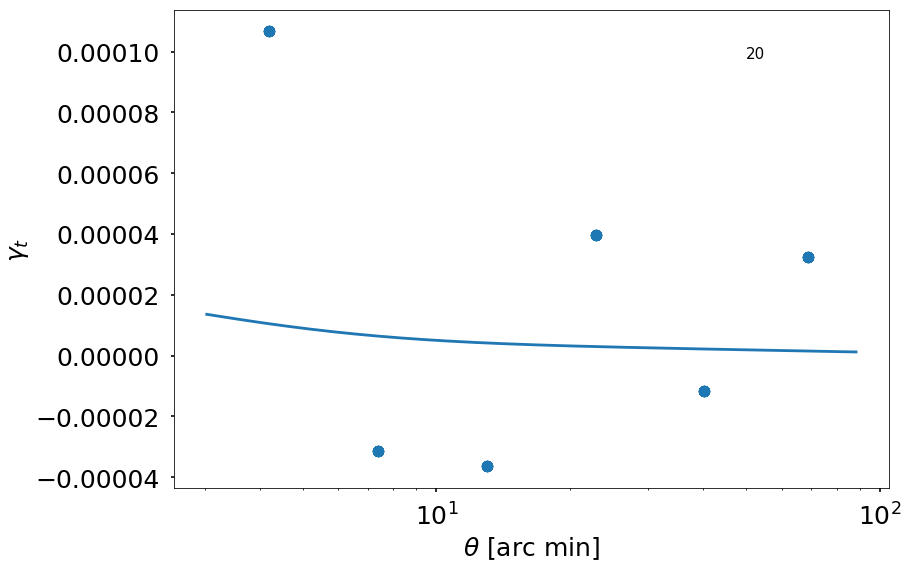

In [33]:
f, ax = plt.subplots()

files = glob.glob('/global/cscratch1/sd/ihasan/flask/output/*')
for f in files:

    corr = gm_f['{}{}'.format(2,0)]
    ax.errorbar(corr['r'], -1*corr['xi+'], fmt='C0o', alpha=.3)
    print(f)

ax.plot(costheta[mask_theta].to(u.arcmin),
                gm_c['{}{}'.format(2,0)][mask_theta].values.flatten())
#ax.set_yscale('log', nonposy='clip')
ax.set_xscale('log')
    #ax[j,i].set_ylim([7*10**-6, .002])

ax.annotate('{}{}'.format(2,0), xy=(.8,.9), xycoords='axes fraction', size=15)

ax.set_ylabel(r'$\gamma_t$')
ax.set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('gammat-zoom.png')

In [31]:
len(files)

42

In [57]:
 gm_c['{}{}'.format(1,2)][mask_theta].values.flatten()

array([8.12782125e-04, 7.99268098e-04, 7.85733258e-04, 7.72190306e-04,
       7.58692889e-04, 7.45222556e-04, 7.31766988e-04, 7.18417234e-04,
       7.05070645e-04, 6.91847847e-04, 6.78676710e-04, 6.65613485e-04,
       6.52651358e-04, 6.39791903e-04, 6.27066477e-04, 6.14456383e-04,
       6.01992459e-04, 5.89663692e-04, 5.77493023e-04, 5.65476262e-04,
       5.53622876e-04, 5.41940097e-04, 5.30431600e-04, 5.19105156e-04,
       5.07957568e-04, 4.97003541e-04, 4.86237629e-04, 4.75670737e-04,
       4.65294795e-04, 4.55125809e-04, 4.45153718e-04, 4.35389254e-04,
       4.25822376e-04, 4.16468723e-04, 4.07315127e-04, 3.98370441e-04,
       3.89624111e-04, 3.81091069e-04, 3.72755689e-04, 3.64625140e-04,
       3.56688673e-04, 3.48960809e-04, 3.41423983e-04, 3.34084170e-04,
       3.26931066e-04, 3.19978297e-04, 3.13206693e-04, 3.06621526e-04,
       3.00213445e-04, 2.93994282e-04, 2.87943396e-04, 2.82066207e-04,
       2.76354548e-04, 2.70817578e-04, 2.65433806e-04, 2.60209558e-04,
      

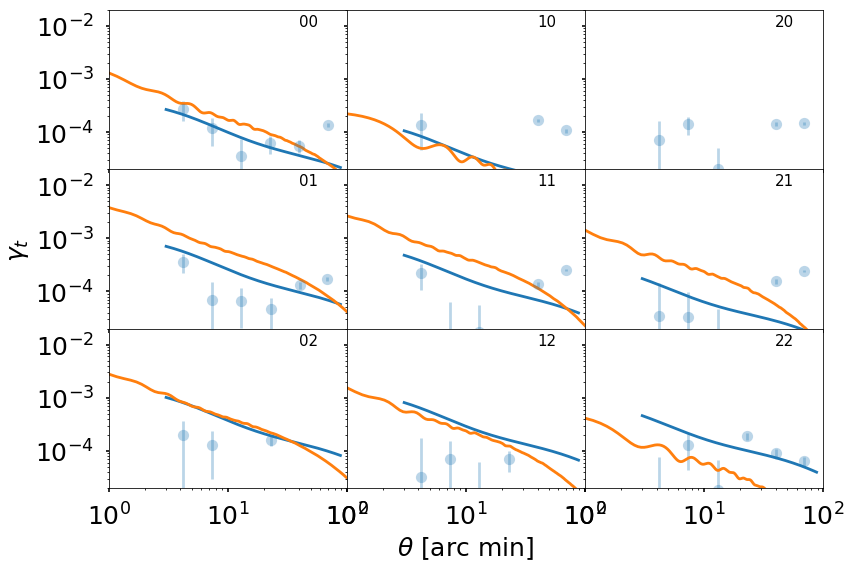

In [21]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row')

f_root = '/global/cscratch1/sd/ihasan/flask/output/1234'

for i in range(0,3):
    for j in range(0,3):
        xi_rec = pd.read_csv('/global/homes/i/ihasan/my_packages/flask/test/Xi-f{}z{}f{}z{}.dat'.format(i,i,7,j),
                            names=['deg','xi'], sep='\s+')
        corr = pd.read_csv(f_root+'/{}{}_gm.csv'.format(i,j))
        ax[j,i].errorbar(corr['r'], corr['xi+'], yerr=corr['sig'], fmt='C0o', alpha=.3)
        ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c['{}{}'.format(i,j)][mask_theta])
        ax[j,i].set_yscale('log', nonposy='clip')
        ax[j,i].set_xscale('log')
        ax[j,i].set_ylim([2*10**-5, .02])
        ax[j,i].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
        ax[j,i].

ax[1,0].set_ylabel(r'$\gamma_t$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('gammat.png')

In [45]:
pd.read_csv('/global/homes/i/ihasan/my_packages/flask/test/Xi-f{}z{}f{}z{}.dat'.format(1,1,7,1),
                            names=['deg','xi'], sep='\s+')

,deg,xi
0,0.001500,4.877706e-04
1,0.004500,4.809035e-04
2,0.007500,4.674675e-04
3,0.010500,4.480422e-04
4,0.013500,4.234547e-04
5,0.016499,3.947325e-04
6,0.019499,3.630454e-04
7,0.022499,3.296403e-04
8,0.025499,2.957729e-04
9,0.028499,2.626413e-04


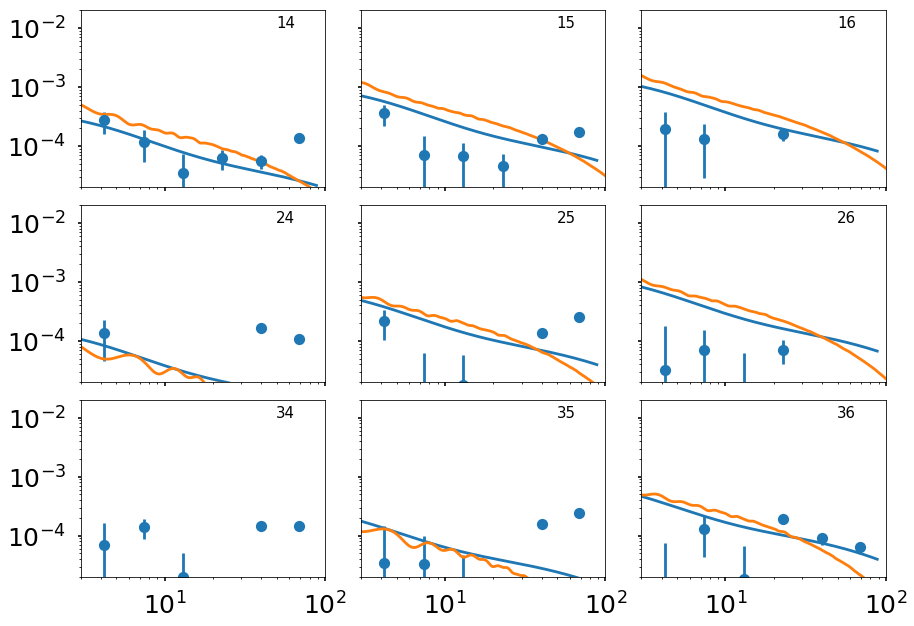

In [36]:
gm_c = {}
for i in range(1,4):
    for j in range(4,7):
#            print(i,j)
            gm_c['{}{}'.format(i,j)] = pd.read_csv(join(cosdir,'galaxy_shear_xi/bin_{}_{}.txt'.format(i,j)),
                                                       names=['xi'], header=0)
    
gm_f ={} 
for i in range(1,4):
    for j in range(4,7):
#            print(i,j)
            gm_f['{}{}'.format(i,j)] = pd.read_csv('/global/homes/i/ihasan/my_packages/flask/test/Xi-f{}z{}f7z{}.dat'.format(i,i,j),
                                                       names=['deg','xi'], sep='\s+')
    
    
f, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row')

for i in (1,2,3):
    for j in (4,5,6):
        ax[i-1,j-4].plot(costheta[mask_theta].to(u.arcmin), gm_c['{}{}'.format(i,j)][mask_theta])
        ax[i-1,j-4].plot(gm_f['{}{}'.format(i,j)]['deg']*60, gm_f['{}{}'.format(i,j)]['xi'])
        ax[i-1,j-4].set_yscale('log')
        ax[i-1,j-4].set_xscale('log')
        ax[i-1,j-4].set_xlim([3,100])
        ax[i-1,j-4].set_ylim([2*10**-5, .02])
        ax[i-1,j-4].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
        
for i in range(0,3):
    for j in range(0,3):
        corr = pd.read_csv(f_root+'/{}{}_gm.csv'.format(i,j))
        ax[i,j].errorbar(corr['r'], corr['xi+'], yerr=corr['sig'], fmt='C0o')

        
plt.tight_layout()

In [3]:
import treecorr
def posshear(dataFrame, dataFrame2):
    '''calculate shear-shear correlation '''
    ggkwargs = {'min_sep':1, 'max_sep':110, 'nbins':7, 'sep_units':'arcmin'}
    ng = treecorr.NGCorrelation(**ggkwargs)
    tree_cat1 = treecorr.Catalog(ra = dataFrame['alpha'], dec = dataFrame['delta'],
                 ra_units = 'deg', dec_units = 'deg', g1=dataFrame['e1'], g2=dataFrame['e2'])
    tree_cat2 = treecorr.Catalog(ra = dataFrame2['alpha'], dec = dataFrame2['delta'],
                 ra_units = 'deg', dec_units = 'deg', g1=dataFrame2['e1'], g2=dataFrame2['e2'],
                                flip_g2=True)
    ng.process(tree_cat1, tree_cat2)

    r = np.exp(ng.meanlogr)
    xip = ng.xi
    xim = ng.xi_im
    sig = np.sqrt(ng.varxi)
        
    return {'xip': xip, 'xim': xim, 'r':r, 'sig':sig}

def shearshear(dataFrame, dataFrame2):
    ggkwargs = {'min_sep':1, 'max_sep':110, 'nbins':5, 'sep_units':'arcmin'}
    gg = treecorr.GGCorrelation(**ggkwargs)
    tree_cat1 = treecorr.Catalog(ra = dataFrame['alpha'], dec = dataFrame['delta'],
                 ra_units = 'deg', dec_units = 'deg', g1=dataFrame['e1'], g2=dataFrame['e2'])
    tree_cat2 = treecorr.Catalog(ra = dataFrame2['alpha'], dec = dataFrame2['delta'],
                 ra_units = 'deg', dec_units = 'deg', g1=dataFrame2['e1'], g2=dataFrame2['e2'])
    gg.process(tree_cat1, tree_cat2)

    r = np.exp(gg.meanlogr)
    xip = gg.xip
    xim = gg.xim
    sig = np.sqrt(gg.varxip)
        
    return {'xip': xip, 'xim': xim, 'r':r, 'sig':sig}

In [ ]:
t = pd.read_csv('/global/homes/i/ihasan/my_packages/flask/example/catalog.dat',
                names=['alpha', 'delta', 'z', 'kappa', 'gamma1', 'gamma2', 'e1', 'e2', 'z_bin'],
                sep='\s+', header=1)

In [4]:
t.head()

,alpha,delta,z,kappa,gamma1,gamma2,e1,e2,z_bin
0,14.032494,45.326061,0.306182,-0.003180,-0.000981,0.000041,-0.097548,0.125440,1
1,14.018777,45.322868,0.444261,-0.004945,-0.000367,0.000285,0.036025,-0.098123,1
2,14.001702,45.279919,0.373209,-0.004945,-0.000367,0.000285,0.163744,-0.070476,1
3,14.014562,45.290482,0.379185,-0.004945,-0.000367,0.000285,-0.104783,0.027536,1
4,14.130692,45.253296,0.397819,-0.004945,-0.000367,0.000285,0.026502,-0.075636,1


In [34]:
ggl = posshear(t[t['z'] < .35], t[t['z'] > .35])

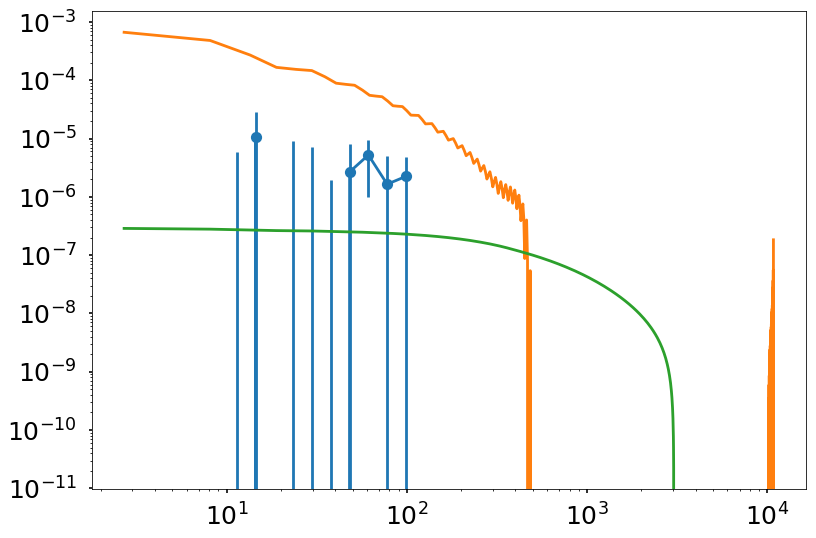

In [35]:
plt.errorbar(ggl['r'], ggl['xip'], yerr = ggl['sig'], fmt='C0o')
plt.yscale('log')
plt.xscale('log')

plt.plot(ggl['r'], ggl['xip'])

#recovered xi
xi = pd.read_csv('/global/homes/i/ihasan/my_packages/flask/example/Xi-f1z1f2z2.dat',
                names=['deg', 'xi'], sep='\s+')
plt.plot(xi['deg']*60, xi['xi'])
#recovered xi
xi = pd.read_csv('/global/homes/i/ihasan/my_packages/flask/example/Xi-f1z2f2z1.dat',
                names=['deg', 'xi'], sep='\s+')
plt.plot(xi['deg']*60, xi['xi'])

In [20]:
ggl['xip']

array([-2.47806305e-06, -1.29145723e-06, -3.88972272e-06, -1.80293761e-06,
       -5.35778799e-07, -7.69531040e-07,  4.79975804e-06,  3.86238720e-06,
        3.00857602e-06,  5.63584076e-06])

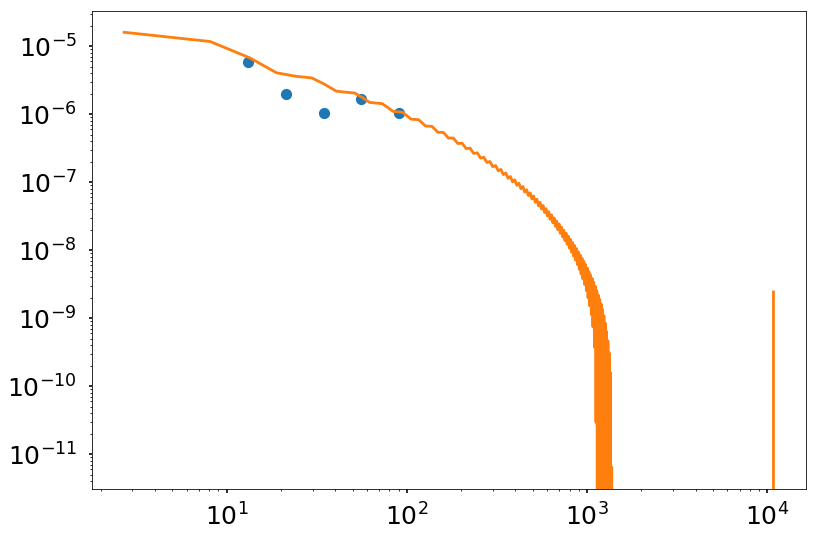

In [36]:
gg = shearshear(t[t['z'] > .35], t[t['z'] > .35])

plt.plot(gg['r'], gg['xip'], 'o')
plt.loglog()

xi = pd.read_csv('/global/homes/i/ihasan/my_packages/flask/example/Xi-f2z2f2z2.dat',
                names=['deg', 'xi'], sep='\s+')
plt.plot(xi['deg']*60, xi['xi'])

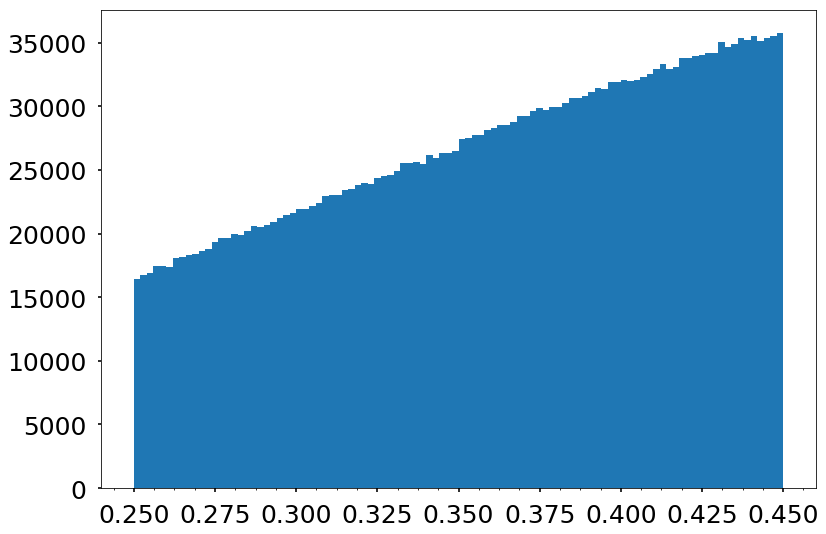

In [5]:
plt.hist(t['z'], bins=100);

# Other correlations

In [9]:
other_path = 'DLS_corrs_faint/'
path = 'DLS_corrs/'

In [10]:
gg = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            gg['{}{}'.format(i,j)] = pd.read_csv(path+'{}{}_gg.csv'.format(i,j))

In [11]:
other_gg = {}
for i in range(0,3):
    for j in range(0,3):
        if j > i:
            pass
        else:
            other_gg['{}{}'.format(i,j)] = pd.read_csv(other_path+'{}{}_gg.csv'.format(i,j))

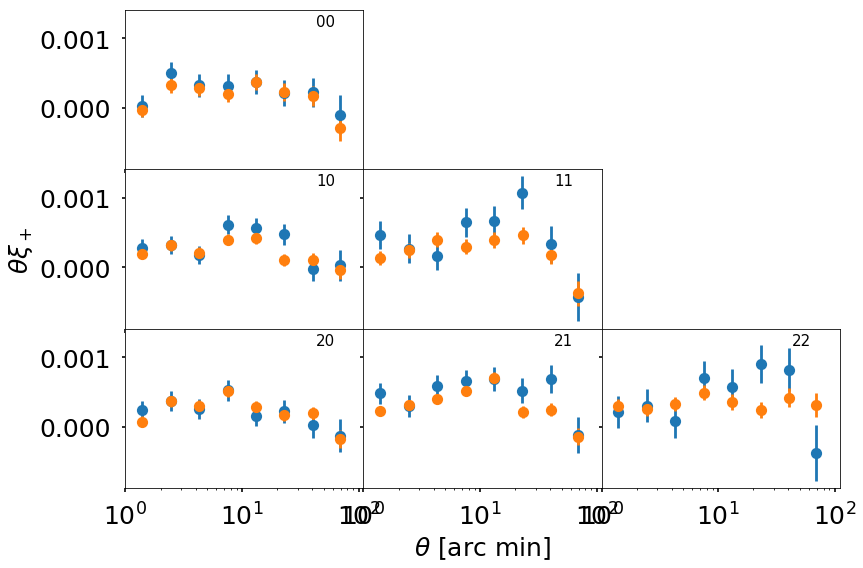

In [16]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
            ax[i,j].axis('off')
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(corr['r'], corr['r']*corr['xip'], yerr=corr['r']*corr['sig'],fmt='C0o')
            ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            other_corr = other_gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(other_corr['r'], other_corr['r']*other_corr['xip'], yerr=other_corr['r']*other_corr['sig'],fmt='C1o')
#            ax[i,j].set_yscale('log')
            ax[i,j].set_xscale('log')
#            ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c['{}{}'.format(i,j)][mask_theta])
            #ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c_s['{}{}'.format(i,j)][mask_theta],
            #           ls='--')

            #corr = gg_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C1v')



ax[1,0].set_ylabel(r'$\theta \xi_+$')
ax[1,0].set_xlim([1,110])
#ax[1,0].set_ylim([3e-7,3e-4])
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('xi+.png', transparent = True)

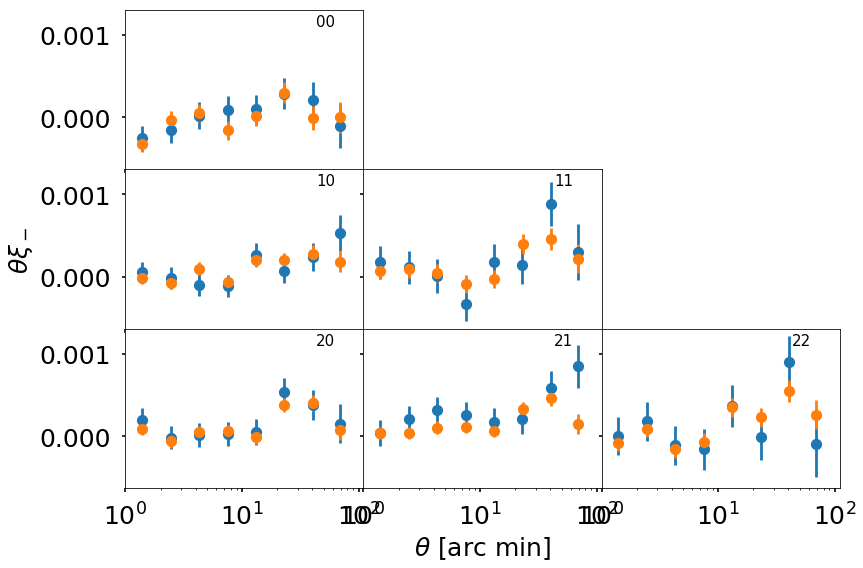

In [15]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(0,3):
    for j in range(0,3):
        if j > i :
            ax[i,j].axis('off')
        else:
            corr = gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(corr['r'], corr['r']*corr['xim'], yerr=corr['r']*corr['sig'],fmt='C0o')
            ax[i,j].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)
            other_corr = other_gg['{}{}'.format(i,j)]
            ax[i,j].errorbar(other_corr['r'], other_corr['r']*other_corr['xim'], yerr=other_corr['r']*other_corr['sig'],fmt='C1o')
#            ax[i,j].set_yscale('log')
            ax[i,j].set_xscale('log')
#            ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c['{}{}'.format(i,j)][mask_theta])
            #ax[i,j].plot(costheta[mask_theta].to(u.arcmin), gg_c_s['{}{}'.format(i,j)][mask_theta],
            #           ls='--')

            #corr = gg_f['{}{}'.format(i,j)]
            #ax[i,j].errorbar(corr['r'], corr['xip'], yerr=corr['sig'],fmt='C1v')



ax[1,0].set_ylabel(r'$\theta \xi_-$')
ax[1,0].set_xlim([1,110])
#ax[1,0].set_ylim([3e-7,3e-4])
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('xi-.png', transparent = True)

In [6]:
lens= pd.read_hdf('/global/cscratch1/sd/ihasan/DLS_catalogs/lens.hdf','/data')

In [7]:
len(lens)

87306

In [8]:
lens= pd.read_hdf('../catalogs/lens_pz.hdf','/data')

In [9]:
len(lens)

192768

In [6]:
gm = {}
for i in range(0,3):
    for j in range(0,3):
        gm['{}{}'.format(i,j)] = pd.read_csv(other_path+'{}{}_gm.csv'.format(i,j))

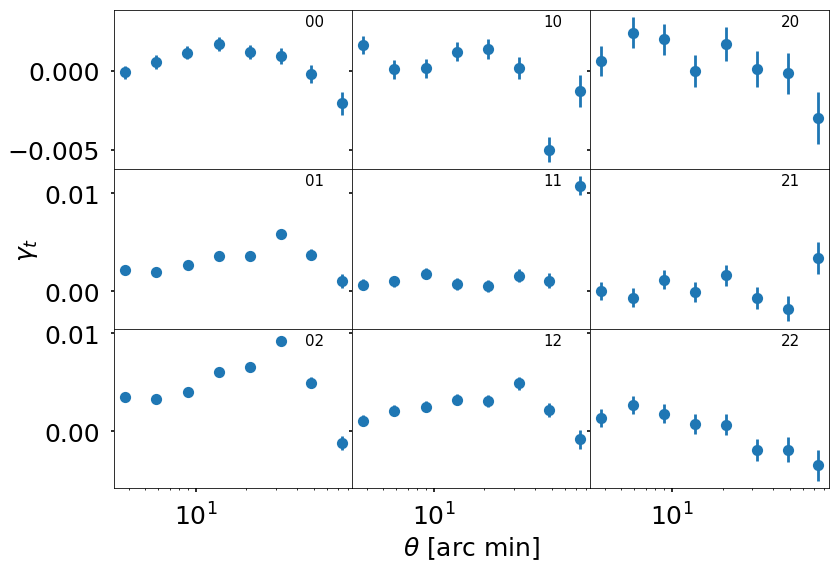

In [11]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row')

for i in range(0,3):
    for j in range(0,3):
        corr = gm['{}{}'.format(i,j)]
        ax[j,i].errorbar(corr['r'], corr['r']*corr['xi+'], yerr=corr['r']*corr['sig'], fmt='C0o')
        #ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c['{}{}'.format(i,j)][mask_theta])
        #ax[j,i].plot(costheta[mask_theta].to(u.arcmin), gm_c_s['{}{}'.format(i,j)][mask_theta],
        #            ls='--')

#        ax[j,i].set_yscale('log', nonposy='clip')
        ax[j,i].set_xscale('log')
#        ax[j,i].set_ylim([2*10**-6, .002])
        ax[j,i].annotate('{}{}'.format(i,j), xy=(.8,.9), xycoords='axes fraction', size=15)

ax[1,0].set_ylabel(r'$\gamma_t$')
ax[2,1].set_xlabel(r'$\theta$ [arc min]')
#plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('gammat_cosmo.png', trasparent=True)

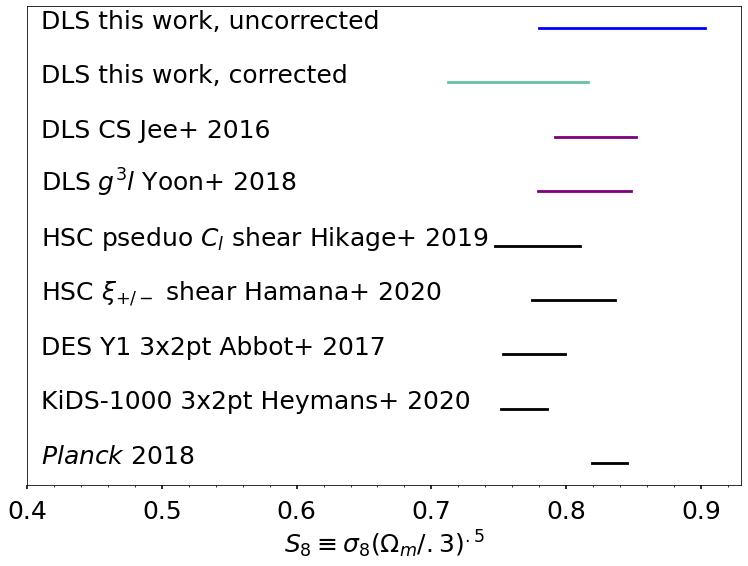

In [69]:
#DLScorrected .739 + .054 - .050
#DLS uncorrected .841 + 0.062- .061 
#DLS cs .818 +.034 -.026
#DLS g3l .810 + 0.038 - .031
#HSC pseudo-cl Hikage 2019 S _8=0.780^{+0.030}_{-0.033}
#HSC shear Hamana 2020 0.804_{-0.029}^{+0.032}
#DES Y1 3x2pt Abbot 2017 .773 + .026 - .020
#KiDS 1000 3x2pt Heymans 2020 .76 + .02 - .014
#Planck 2018 0.832+/-0.013

plt.plot([.841-.061, .841+.062],[9,9], color='blue')
plt.annotate('DLS this work, uncorrected',xy=(.41,9), size=25)
plt.plot([.762-.050, .762+.054],[8,8], color='#66c2a5')
plt.annotate('DLS this work, corrected',xy=(.41,8), size=25)
plt.plot([.818+.034, .818-.026],[7,7], color='purple')
plt.annotate('DLS CS Jee+ 2016', xy=(.41,7), size=25)
plt.plot([.810+.038, .810-.031],[6,6], color='purple')
plt.annotate('DLS $g^3l$ Yoon+ 2018', xy=(.41,6), size=25)
plt.plot([.780+.030, .780-.033],[5,5], color='k')
plt.annotate('HSC pseduo $C_l$ shear Hikage+ 2019',xy=(.41,5), size=25)
plt.plot([.804+.032, .804-.029],[4,4], color='k')
plt.annotate(r'HSC $\xi_{+/-}$ shear Hamana+ 2020',xy=(.41,4), size=25)
plt.plot([.773-.020, .773+.026],[3,3], color='k')
plt.annotate('DES Y1 3x2pt Abbot+ 2017',xy=(.41,3), size=25)
plt.plot([.766-.014, .766+.020],[2,2], color='k')
plt.annotate('KiDS-1000 3x2pt Heymans+ 2020',xy=(.41,2), size=25)
plt.plot([.832+.013, .832-.013],[1,1], color='k')
plt.annotate('$Planck$ 2018',xy=(.41,1), size=25)

plt.xlim([.4,.93])

ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.xlabel('$S_8 \equiv \sigma_8(\Omega_m/.3)^{.5}$', size=25)
plt.savefig('compare_cosmo.pdf')

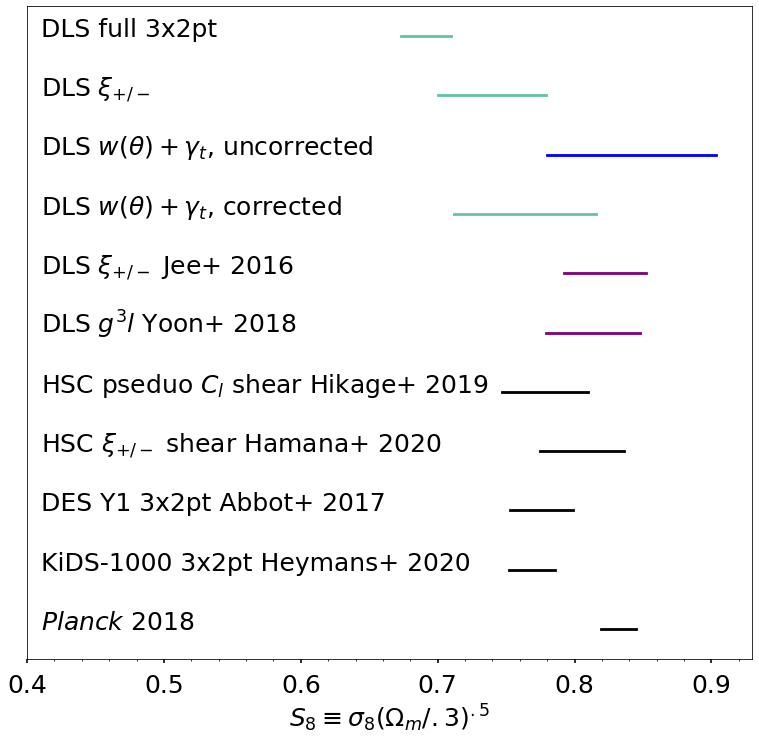

In [15]:
plt.figure(figsize=(13,12))
plt.plot([0.69-.017, 0.69+.020],[11,11],color='#66c2a5')
plt.annotate(r'DLS full 3x2pt', xy=(.41,11), size=25)
plt.plot([0.739-.039, 0.739+.04],[10,10],color='#66c2a5')
plt.annotate(r'DLS $\xi_{+/-}$', xy=(.41,10), size=25)
plt.plot([.841-.061, .841+.062],[9,9], color='blue')
plt.annotate(r'DLS $w(\theta) + \gamma_t$, uncorrected',xy=(.41,9), size=25)
plt.plot([.762-.050, .762+.054],[8,8], color='#66c2a5')
plt.annotate(r'DLS $w(\theta) + \gamma_t$, corrected',xy=(.41,8), size=25)
plt.plot([.818+.034, .818-.026],[7,7], color='purple')
plt.annotate(r'DLS $\xi_{+/-}$ Jee+ 2016', xy=(.41,7), size=25)
plt.plot([.810+.038, .810-.031],[6,6], color='purple')
plt.annotate('DLS $g^3l$ Yoon+ 2018', xy=(.41,6), size=25)
plt.plot([.780+.030, .780-.033],[5,5], color='k')
plt.annotate('HSC pseduo $C_l$ shear Hikage+ 2019',xy=(.41,5), size=25)
plt.plot([.804+.032, .804-.029],[4,4], color='k')
plt.annotate(r'HSC $\xi_{+/-}$ shear Hamana+ 2020',xy=(.41,4), size=25)
plt.plot([.773-.020, .773+.026],[3,3], color='k')
plt.annotate('DES Y1 3x2pt Abbot+ 2017',xy=(.41,3), size=25)
plt.plot([.766-.014, .766+.020],[2,2], color='k')
plt.annotate('KiDS-1000 3x2pt Heymans+ 2020',xy=(.41,2), size=25)
plt.plot([.832+.013, .832-.013],[1,1], color='k')
plt.annotate('$Planck$ 2018',xy=(.41,1), size=25)

plt.xlim([.4,.93])

ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.xlabel('$S_8 \equiv \sigma_8(\Omega_m/.3)^{.5}$', size=25)
plt.savefig('compare_cosmo.pdf')